In [ ]:
%pip install sklearn
%pip uninstall umap
%pip install umap-learn
%pip install matplotlib 
%pip install seaborn
%pip install umap-learn[plot]
%pip uninstall umap
%pip install umap-learn

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import graphviz
from sklearn.tree import export_graphviz
import os
from sklearn.datasets import make_classification
import umap.umap_ as umap
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\urszu\AppData\Local\Programs\Python\Python3

In [89]:
df = pd.read_excel("dane.xlsx")

In [90]:
display(df)
df.value_counts("Type")
df.value_counts("location")

,Tweet,following,followers,actions,is_retweet,location,Type
0,Good Morning Love @LeeBrown_V,0.0,0.0,0.0,0.0,"Pennsylvania, USA",Quality
1,'@realDonaldTrump @USNavy RIP TO HEROES',42096.0,61060.0,5001.0,0.0,"South Padre Island, Texas",Spam
2,Haven't been following the news but I understa...,0.0,0.0,NaN,0.0,Will never be broke ever again,Quality
3,pic.twitter.com/dy9q4ftLhZ What to do with pap...,0.0,0.0,0.0,0.0,Mundo,Quality
4,#DidYouKnow Mahatma Gandhi made a brief visit...,17800.0,35100.0,NaN,0.0,"Nottingham, England",Quality
...,...,...,...,...,...,...,...
14892,"#AllWentWrongWhen I told my hair stylist to ""g...",695.0,533.0,868.0,1.0,United States,Spam
14893,"They don't have to like you, and you don't hav...",0.0,0.0,0.0,0.0,NaN,Quality
14894,#Miami Graham Nash Live at Parker Playhouse #...,5647.0,15091.0,5823.0,0.0,United States,Spam
14895,@bethannhamilton is in the business of one-upp...,0.0,0.0,NaN,0.0,"Southgate, MI",Quality


location
United States          4166
United Kingdom           78
Washington, DC           49
Los Angeles, CA          49
New York, NY             48
                       ... 
Germany, Potsdam          1
The Castle                1
Gilberdyke, England       1
The Bay Area              1
Upper East Side           1
Length: 3436, dtype: int64

In [7]:
X = df["Tweet"]
y = df["Type"]
result_table = pd.DataFrame()
a = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]


for i in a:  
    for j in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X.index, y, test_size=i, random_state=42)
        X_train = X.iloc[X_train]
        X_test = X.iloc[X_test]

        vectorizer = TfidfVectorizer(max_features=50)

        X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
        X_test_tfidf = vectorizer.transform(X_test).toarray()

        pd.DataFrame(X_train_tfidf, columns=vectorizer.get_feature_names_out())

        X_tr = X_train_tfidf
        X_te = X_test_tfidf

        cl0 = tree.DecisionTreeClassifier().fit(X_tr, y_train)
        cl1 = KNeighborsClassifier().fit(X_tr, y_train)
        cl2 = MLPClassifier(max_iter=500).fit(X_tr, y_train)
        cl3 = SVC().fit(X_tr, y_train)

        cl4 = RandomForestClassifier().fit(X_tr, y_train)
        cl5 = AdaBoostClassifier().fit(X_tr, y_train)
        cl6 = GaussianNB().fit(X_tr, y_train)
        cl7 = QuadraticDiscriminantAnalysis().fit(X_tr, y_train)

        y_cl0_pred = cl0.predict(X_te)
        y_cl1_pred = cl1.predict(X_te)
        y_cl2_pred = cl2.predict(X_te)
        y_cl3_pred = cl3.predict(X_te)
        y_cl5_pred = cl5.predict(X_te)
        y_cl4_pred = cl4.predict(X_te)
        y_cl6_pred = cl6.predict(X_te)
        y_cl7_pred = cl7.predict(X_te)

        print("Accuracy (cl0 DecisionTreeClassifier):",metrics.accuracy_score(y_test, y_cl0_pred))
        print("Accuracy (cl1 KNeighborsClassifier):",metrics.accuracy_score(y_test, y_cl1_pred))
        print("Accuracy (cl2 MLPClassifier):",metrics.accuracy_score(y_test, y_cl2_pred))
        print("Accuracy (cl3 SVC):",metrics.accuracy_score(y_test, y_cl3_pred))
        print("Accuracy (cl4 RandomForestClassifier):",metrics.accuracy_score(y_test, y_cl4_pred))
        print("Accuracy (Cl5 AdaBoostClasifier):",metrics.accuracy_score(y_test, y_cl5_pred))
        print("Accuracy (Cl6 Naive_BayesClaasifier):",metrics.accuracy_score(y_test, y_cl6_pred))
        print("Accuracy (Cl7 QuadraticDiscriminantAnalysis):",metrics.accuracy_score(y_test, y_cl7_pred))

        cl0_DecisionTreeClassifier=metrics.accuracy_score(y_test, y_cl0_pred)
        cl1_KNeighborsClassifier=metrics.accuracy_score(y_test, y_cl1_pred)
        cl2_MLPClassifier=metrics.accuracy_score(y_test, y_cl2_pred)
        cl3_SVC=metrics.accuracy_score(y_test, y_cl3_pred)
        cl4_RandomForestClassifier=metrics.accuracy_score(y_test, y_cl4_pred)
        Cl5_AdaBoostClasifier=metrics.accuracy_score(y_test, y_cl5_pred)
        Cl6_Naive_BayesClaasifier=metrics.accuracy_score(y_test, y_cl6_pred)
        Cl7_QuadraticDiscriminantAnalysis=metrics.accuracy_score(y_test, y_cl7_pred)

        np_array = np.array([cl0_DecisionTreeClassifier,cl1_KNeighborsClassifier,cl2_MLPClassifier,cl3_SVC,cl4_RandomForestClassifier,Cl5_AdaBoostClasifier,Cl6_Naive_BayesClaasifier,Cl7_QuadraticDiscriminantAnalysis])
        result_table[str(str(j+1) + " " + str(i))] = pd.DataFrame(np_array)
        print(j)
        
        display(result_table)
        print(" ")
        print(" ")

C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (cl0 DecisionTreeClassifier): 0.8288590604026845
Accuracy (cl1 KNeighborsClassifier): 0.789261744966443
Accuracy (cl2 MLPClassifier): 0.8355704697986577
Accuracy (cl3 SVC): 0.8449664429530201
Accuracy (cl4 RandomForestClassifier): 0.8348993288590604
Accuracy (Cl5 AdaBoostClasifier): 0.838255033557047
Accuracy (Cl6 Naive_BayesClaasifier): 0.7630872483221477
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7912751677852349
0


,1 0.1
0,0.828859
1,0.789262
2,0.835570
3,0.844966
4,0.834899
5,0.838255
6,0.763087
7,0.791275


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (cl0 DecisionTreeClassifier): 0.8248322147651007
Accuracy (cl1 KNeighborsClassifier): 0.789261744966443
Accuracy (cl2 MLPClassifier): 0.8449664429530201
Accuracy (cl3 SVC): 0.8449664429530201
Accuracy (cl4 RandomForestClassifier): 0.8322147651006712
Accuracy (Cl5 AdaBoostClasifier): 0.838255033557047
Accuracy (Cl6 Naive_BayesClaasifier): 0.7630872483221477
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7912751677852349
1


,1 0.1,2 0.1
0,0.828859,0.824832
1,0.789262,0.789262
2,0.835570,0.844966
3,0.844966,0.844966
4,0.834899,0.832215
5,0.838255,0.838255
6,0.763087,0.763087
7,0.791275,0.791275


 
 
Accuracy (cl0 DecisionTreeClassifier): 0.8228187919463087
Accuracy (cl1 KNeighborsClassifier): 0.789261744966443
Accuracy (cl2 MLPClassifier): 0.8436241610738255
Accuracy (cl3 SVC): 0.8449664429530201
Accuracy (cl4 RandomForestClassifier): 0.8355704697986577
Accuracy (Cl5 AdaBoostClasifier): 0.838255033557047
Accuracy (Cl6 Naive_BayesClaasifier): 0.7630872483221477
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7912751677852349
2


,1 0.1,2 0.1,3 0.1
0,0.828859,0.824832,0.822819
1,0.789262,0.789262,0.789262
2,0.835570,0.844966,0.843624
3,0.844966,0.844966,0.844966
4,0.834899,0.832215,0.835570
5,0.838255,0.838255,0.838255
6,0.763087,0.763087,0.763087
7,0.791275,0.791275,0.791275


 
 
Accuracy (cl0 DecisionTreeClassifier): 0.8275167785234899
Accuracy (cl1 KNeighborsClassifier): 0.789261744966443
Accuracy (cl2 MLPClassifier): 0.8369127516778524
Accuracy (cl3 SVC): 0.8449664429530201
Accuracy (cl4 RandomForestClassifier): 0.8322147651006712
Accuracy (Cl5 AdaBoostClasifier): 0.838255033557047
Accuracy (Cl6 Naive_BayesClaasifier): 0.7630872483221477
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7912751677852349
3


,1 0.1,2 0.1,3 0.1,4 0.1
0,0.828859,0.824832,0.822819,0.827517
1,0.789262,0.789262,0.789262,0.789262
2,0.835570,0.844966,0.843624,0.836913
3,0.844966,0.844966,0.844966,0.844966
4,0.834899,0.832215,0.835570,0.832215
5,0.838255,0.838255,0.838255,0.838255
6,0.763087,0.763087,0.763087,0.763087
7,0.791275,0.791275,0.791275,0.791275


 
 
Accuracy (cl0 DecisionTreeClassifier): 0.8275167785234899
Accuracy (cl1 KNeighborsClassifier): 0.789261744966443
Accuracy (cl2 MLPClassifier): 0.8429530201342282
Accuracy (cl3 SVC): 0.8449664429530201
Accuracy (cl4 RandomForestClassifier): 0.8342281879194631
Accuracy (Cl5 AdaBoostClasifier): 0.838255033557047
Accuracy (Cl6 Naive_BayesClaasifier): 0.7630872483221477
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7912751677852349
4


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1
0,0.828859,0.824832,0.822819,0.827517,0.827517
1,0.789262,0.789262,0.789262,0.789262,0.789262
2,0.835570,0.844966,0.843624,0.836913,0.842953
3,0.844966,0.844966,0.844966,0.844966,0.844966
4,0.834899,0.832215,0.835570,0.832215,0.834228
5,0.838255,0.838255,0.838255,0.838255,0.838255
6,0.763087,0.763087,0.763087,0.763087,0.763087
7,0.791275,0.791275,0.791275,0.791275,0.791275


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (cl0 DecisionTreeClassifier): 0.823489932885906
Accuracy (cl1 KNeighborsClassifier): 0.789261744966443
Accuracy (cl2 MLPClassifier): 0.8416107382550335
Accuracy (cl3 SVC): 0.8449664429530201
Accuracy (cl4 RandomForestClassifier): 0.8281879194630872
Accuracy (Cl5 AdaBoostClasifier): 0.838255033557047
Accuracy (Cl6 Naive_BayesClaasifier): 0.7630872483221477
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7912751677852349
5


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (cl0 DecisionTreeClassifier): 0.8295302013422818
Accuracy (cl1 KNeighborsClassifier): 0.789261744966443
Accuracy (cl2 MLPClassifier): 0.8395973154362416
Accuracy (cl3 SVC): 0.8449664429530201
Accuracy (cl4 RandomForestClassifier): 0.8308724832214766
Accuracy (Cl5 AdaBoostClasifier): 0.838255033557047
Accuracy (Cl6 Naive_BayesClaasifier): 0.7630872483221477
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7912751677852349
6


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275


 
 
Accuracy (cl0 DecisionTreeClassifier): 0.8248322147651007
Accuracy (cl1 KNeighborsClassifier): 0.789261744966443
Accuracy (cl2 MLPClassifier): 0.8348993288590604
Accuracy (cl3 SVC): 0.8449664429530201
Accuracy (cl4 RandomForestClassifier): 0.8308724832214766
Accuracy (Cl5 AdaBoostClasifier): 0.838255033557047
Accuracy (Cl6 Naive_BayesClaasifier): 0.7630872483221477
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7912751677852349
7


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (cl0 DecisionTreeClassifier): 0.8275167785234899
Accuracy (cl1 KNeighborsClassifier): 0.789261744966443
Accuracy (cl2 MLPClassifier): 0.8342281879194631
Accuracy (cl3 SVC): 0.8449664429530201
Accuracy (cl4 RandomForestClassifier): 0.8375838926174497
Accuracy (Cl5 AdaBoostClasifier): 0.838255033557047
Accuracy (Cl6 Naive_BayesClaasifier): 0.7630872483221477
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7912751677852349
8


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (cl0 DecisionTreeClassifier): 0.8248322147651007
Accuracy (cl1 KNeighborsClassifier): 0.789261744966443
Accuracy (cl2 MLPClassifier): 0.8409395973154362
Accuracy (cl3 SVC): 0.8449664429530201
Accuracy (cl4 RandomForestClassifier): 0.8322147651006712
Accuracy (Cl5 AdaBoostClasifier): 0.838255033557047
Accuracy (Cl6 Naive_BayesClaasifier): 0.7630872483221477
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7912751677852349
9


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (cl0 DecisionTreeClassifier): 0.8322147651006712
Accuracy (cl1 KNeighborsClassifier): 0.8093959731543624
Accuracy (cl2 MLPClassifier): 0.838255033557047
Accuracy (cl3 SVC): 0.8476510067114094
Accuracy (cl4 RandomForestClassifier): 0.8385906040268456
Accuracy (Cl5 AdaBoostClasifier): 0.8456375838926175
Accuracy (Cl6 Naive_BayesClaasifier): 0.7718120805369127
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7973154362416107
0


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,1 0.2
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,0.832215
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.809396
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,0.838255
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.847651
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,0.838591
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.845638
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.771812
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.797315


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (cl0 DecisionTreeClassifier): 0.8325503355704698
Accuracy (cl1 KNeighborsClassifier): 0.8093959731543624
Accuracy (cl2 MLPClassifier): 0.8369127516778524
Accuracy (cl3 SVC): 0.8476510067114094
Accuracy (cl4 RandomForestClassifier): 0.8412751677852349
Accuracy (Cl5 AdaBoostClasifier): 0.8456375838926175
Accuracy (Cl6 Naive_BayesClaasifier): 0.7718120805369127
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7973154362416107
1


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,1 0.2,2 0.2
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,0.832215,0.832550
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.809396,0.809396
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,0.838255,0.836913
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.847651,0.847651
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,0.838591,0.841275
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.845638,0.845638
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.771812,0.771812
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.797315,0.797315


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (cl0 DecisionTreeClassifier): 0.8348993288590604
Accuracy (cl1 KNeighborsClassifier): 0.8093959731543624
Accuracy (cl2 MLPClassifier): 0.8399328859060403
Accuracy (cl3 SVC): 0.8476510067114094
Accuracy (cl4 RandomForestClassifier): 0.8416107382550335
Accuracy (Cl5 AdaBoostClasifier): 0.8456375838926175
Accuracy (Cl6 Naive_BayesClaasifier): 0.7718120805369127
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7973154362416107
2


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,1 0.2,2 0.2,3 0.2
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,0.832215,0.832550,0.834899
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.809396,0.809396,0.809396
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,0.838255,0.836913,0.839933
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.847651,0.847651,0.847651
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,0.838591,0.841275,0.841611
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.845638,0.845638,0.845638
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.771812,0.771812,0.771812
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.797315,0.797315,0.797315


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (cl0 DecisionTreeClassifier): 0.8345637583892618
Accuracy (cl1 KNeighborsClassifier): 0.8093959731543624
Accuracy (cl2 MLPClassifier): 0.8412751677852349
Accuracy (cl3 SVC): 0.8476510067114094
Accuracy (cl4 RandomForestClassifier): 0.8412751677852349
Accuracy (Cl5 AdaBoostClasifier): 0.8456375838926175
Accuracy (Cl6 Naive_BayesClaasifier): 0.7718120805369127
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7973154362416107
3


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,1 0.2,2 0.2,3 0.2,4 0.2
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,0.832215,0.832550,0.834899,0.834564
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.809396,0.809396,0.809396,0.809396
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,0.838255,0.836913,0.839933,0.841275
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.847651,0.847651,0.847651,0.847651
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,0.838591,0.841275,0.841611,0.841275
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.845638,0.845638,0.845638,0.845638
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.771812,0.771812,0.771812,0.771812
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.797315,0.797315,0.797315,0.797315


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (cl0 DecisionTreeClassifier): 0.8338926174496645
Accuracy (cl1 KNeighborsClassifier): 0.8093959731543624
Accuracy (cl2 MLPClassifier): 0.8399328859060403
Accuracy (cl3 SVC): 0.8476510067114094
Accuracy (cl4 RandomForestClassifier): 0.8399328859060403
Accuracy (Cl5 AdaBoostClasifier): 0.8456375838926175
Accuracy (Cl6 Naive_BayesClaasifier): 0.7718120805369127
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7973154362416107
4


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,1 0.2,2 0.2,3 0.2,4 0.2,5 0.2
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,0.832215,0.832550,0.834899,0.834564,0.833893
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.809396,0.809396,0.809396,0.809396,0.809396
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,0.838255,0.836913,0.839933,0.841275,0.839933
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.847651,0.847651,0.847651,0.847651,0.847651
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,0.838591,0.841275,0.841611,0.841275,0.839933
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.845638,0.845638,0.845638,0.845638,0.845638
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.771812,0.771812,0.771812,0.771812,0.771812
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.797315,0.797315,0.797315,0.797315,0.797315


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (cl0 DecisionTreeClassifier): 0.8359060402684564
Accuracy (cl1 KNeighborsClassifier): 0.8093959731543624
Accuracy (cl2 MLPClassifier): 0.8399328859060403
Accuracy (cl3 SVC): 0.8476510067114094
Accuracy (cl4 RandomForestClassifier): 0.8446308724832214
Accuracy (Cl5 AdaBoostClasifier): 0.8456375838926175
Accuracy (Cl6 Naive_BayesClaasifier): 0.7718120805369127
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7973154362416107
5


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,1 0.2,2 0.2,3 0.2,4 0.2,5 0.2,6 0.2
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,0.832215,0.832550,0.834899,0.834564,0.833893,0.835906
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.809396,0.809396,0.809396,0.809396,0.809396,0.809396
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,0.838255,0.836913,0.839933,0.841275,0.839933,0.839933
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.847651,0.847651,0.847651,0.847651,0.847651,0.847651
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,0.838591,0.841275,0.841611,0.841275,0.839933,0.844631
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.771812,0.771812,0.771812,0.771812,0.771812,0.771812
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.797315,0.797315,0.797315,0.797315,0.797315,0.797315


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (cl0 DecisionTreeClassifier): 0.8338926174496645
Accuracy (cl1 KNeighborsClassifier): 0.8093959731543624
Accuracy (cl2 MLPClassifier): 0.8399328859060403
Accuracy (cl3 SVC): 0.8476510067114094
Accuracy (cl4 RandomForestClassifier): 0.8436241610738255
Accuracy (Cl5 AdaBoostClasifier): 0.8456375838926175
Accuracy (Cl6 Naive_BayesClaasifier): 0.7718120805369127
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7973154362416107
6


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,1 0.2,2 0.2,3 0.2,4 0.2,5 0.2,6 0.2,7 0.2
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,0.832215,0.832550,0.834899,0.834564,0.833893,0.835906,0.833893
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.809396,0.809396,0.809396,0.809396,0.809396,0.809396,0.809396
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,0.838255,0.836913,0.839933,0.841275,0.839933,0.839933,0.839933
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.847651,0.847651,0.847651,0.847651,0.847651,0.847651,0.847651
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,0.838591,0.841275,0.841611,0.841275,0.839933,0.844631,0.843624
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.771812,0.771812,0.771812,0.771812,0.771812,0.771812,0.771812
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.797315,0.797315,0.797315,0.797315,0.797315,0.797315,0.797315


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (cl0 DecisionTreeClassifier): 0.8328859060402685
Accuracy (cl1 KNeighborsClassifier): 0.8093959731543624
Accuracy (cl2 MLPClassifier): 0.8359060402684564
Accuracy (cl3 SVC): 0.8476510067114094
Accuracy (cl4 RandomForestClassifier): 0.8463087248322148
Accuracy (Cl5 AdaBoostClasifier): 0.8456375838926175
Accuracy (Cl6 Naive_BayesClaasifier): 0.7718120805369127
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7973154362416107
7


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,1 0.2,2 0.2,3 0.2,4 0.2,5 0.2,6 0.2,7 0.2,8 0.2
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,0.832215,0.832550,0.834899,0.834564,0.833893,0.835906,0.833893,0.832886
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.809396,0.809396,0.809396,0.809396,0.809396,0.809396,0.809396,0.809396
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,0.838255,0.836913,0.839933,0.841275,0.839933,0.839933,0.839933,0.835906
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.847651,0.847651,0.847651,0.847651,0.847651,0.847651,0.847651,0.847651
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,0.838591,0.841275,0.841611,0.841275,0.839933,0.844631,0.843624,0.846309
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.771812,0.771812,0.771812,0.771812,0.771812,0.771812,0.771812,0.771812
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.797315,0.797315,0.797315,0.797315,0.797315,0.797315,0.797315,0.797315


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (cl0 DecisionTreeClassifier): 0.8318791946308725
Accuracy (cl1 KNeighborsClassifier): 0.8093959731543624
Accuracy (cl2 MLPClassifier): 0.8395973154362416
Accuracy (cl3 SVC): 0.8476510067114094
Accuracy (cl4 RandomForestClassifier): 0.8406040268456376
Accuracy (Cl5 AdaBoostClasifier): 0.8456375838926175
Accuracy (Cl6 Naive_BayesClaasifier): 0.7718120805369127
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7973154362416107
8


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,1 0.2,2 0.2,3 0.2,4 0.2,5 0.2,6 0.2,7 0.2,8 0.2,9 0.2
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,0.832215,0.832550,0.834899,0.834564,0.833893,0.835906,0.833893,0.832886,0.831879
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.809396,0.809396,0.809396,0.809396,0.809396,0.809396,0.809396,0.809396,0.809396
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,0.838255,0.836913,0.839933,0.841275,0.839933,0.839933,0.839933,0.835906,0.839597
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.847651,0.847651,0.847651,0.847651,0.847651,0.847651,0.847651,0.847651,0.847651
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,0.838591,0.841275,0.841611,0.841275,0.839933,0.844631,0.843624,0.846309,0.840604
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.771812,0.771812,0.771812,0.771812,0.771812,0.771812,0.771812,0.771812,0.771812
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.797315,0.797315,0.797315,0.797315,0.797315,0.797315,0.797315,0.797315,0.797315


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (cl0 DecisionTreeClassifier): 0.8369127516778524
Accuracy (cl1 KNeighborsClassifier): 0.8093959731543624
Accuracy (cl2 MLPClassifier): 0.8352348993288591
Accuracy (cl3 SVC): 0.8476510067114094
Accuracy (cl4 RandomForestClassifier): 0.8416107382550335
Accuracy (Cl5 AdaBoostClasifier): 0.8456375838926175
Accuracy (Cl6 Naive_BayesClaasifier): 0.7718120805369127
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7973154362416107
9


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,1 0.2,2 0.2,3 0.2,4 0.2,5 0.2,6 0.2,7 0.2,8 0.2,9 0.2,10 0.2
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,0.832215,0.832550,0.834899,0.834564,0.833893,0.835906,0.833893,0.832886,0.831879,0.836913
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.809396,0.809396,0.809396,0.809396,0.809396,0.809396,0.809396,0.809396,0.809396,0.809396
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,0.838255,0.836913,0.839933,0.841275,0.839933,0.839933,0.839933,0.835906,0.839597,0.835235
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.847651,0.847651,0.847651,0.847651,0.847651,0.847651,0.847651,0.847651,0.847651,0.847651
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,0.838591,0.841275,0.841611,0.841275,0.839933,0.844631,0.843624,0.846309,0.840604,0.841611
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.771812,0.771812,0.771812,0.771812,0.771812,0.771812,0.771812,0.771812,0.771812,0.771812
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.797315,0.797315,0.797315,0.797315,0.797315,0.797315,0.797315,0.797315,0.797315,0.797315


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (cl0 DecisionTreeClassifier): 0.8342281879194631
Accuracy (cl1 KNeighborsClassifier): 0.7910514541387025
Accuracy (cl2 MLPClassifier): 0.8389261744966443
Accuracy (cl3 SVC): 0.8467561521252797
Accuracy (cl4 RandomForestClassifier): 0.8478747203579419
Accuracy (Cl5 AdaBoostClasifier): 0.8456375838926175
Accuracy (Cl6 Naive_BayesClaasifier): 0.789261744966443
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.8035794183445191
0


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,2 0.2,3 0.2,4 0.2,5 0.2,6 0.2,7 0.2,8 0.2,9 0.2,10 0.2,1 0.3
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.832550,0.834899,0.834564,0.833893,0.835906,0.833893,0.832886,0.831879,0.836913,0.834228
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.809396,0.809396,0.809396,0.809396,0.809396,0.809396,0.809396,0.809396,0.809396,0.791051
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.836913,0.839933,0.841275,0.839933,0.839933,0.839933,0.835906,0.839597,0.835235,0.838926
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.847651,0.847651,0.847651,0.847651,0.847651,0.847651,0.847651,0.847651,0.847651,0.846756
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.841275,0.841611,0.841275,0.839933,0.844631,0.843624,0.846309,0.840604,0.841611,0.847875
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.771812,0.771812,0.771812,0.771812,0.771812,0.771812,0.771812,0.771812,0.771812,0.789262
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.797315,0.797315,0.797315,0.797315,0.797315,0.797315,0.797315,0.797315,0.797315,0.803579


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (cl0 DecisionTreeClassifier): 0.8360178970917226
Accuracy (cl1 KNeighborsClassifier): 0.7910514541387025
Accuracy (cl2 MLPClassifier): 0.8395973154362416
Accuracy (cl3 SVC): 0.8467561521252797
Accuracy (cl4 RandomForestClassifier): 0.8487695749440716
Accuracy (Cl5 AdaBoostClasifier): 0.8456375838926175
Accuracy (Cl6 Naive_BayesClaasifier): 0.789261744966443
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.8035794183445191
1


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,3 0.2,4 0.2,5 0.2,6 0.2,7 0.2,8 0.2,9 0.2,10 0.2,1 0.3,2 0.3
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.834899,0.834564,0.833893,0.835906,0.833893,0.832886,0.831879,0.836913,0.834228,0.836018
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.809396,0.809396,0.809396,0.809396,0.809396,0.809396,0.809396,0.809396,0.791051,0.791051
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.839933,0.841275,0.839933,0.839933,0.839933,0.835906,0.839597,0.835235,0.838926,0.839597
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.847651,0.847651,0.847651,0.847651,0.847651,0.847651,0.847651,0.847651,0.846756,0.846756
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.841611,0.841275,0.839933,0.844631,0.843624,0.846309,0.840604,0.841611,0.847875,0.848770
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.771812,0.771812,0.771812,0.771812,0.771812,0.771812,0.771812,0.771812,0.789262,0.789262
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.797315,0.797315,0.797315,0.797315,0.797315,0.797315,0.797315,0.797315,0.803579,0.803579


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (cl0 DecisionTreeClassifier): 0.8351230425055929
Accuracy (cl1 KNeighborsClassifier): 0.7910514541387025
Accuracy (cl2 MLPClassifier): 0.8375838926174497
Accuracy (cl3 SVC): 0.8467561521252797
Accuracy (cl4 RandomForestClassifier): 0.8469798657718121
Accuracy (Cl5 AdaBoostClasifier): 0.8456375838926175
Accuracy (Cl6 Naive_BayesClaasifier): 0.789261744966443
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.8035794183445191
2


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,4 0.2,5 0.2,6 0.2,7 0.2,8 0.2,9 0.2,10 0.2,1 0.3,2 0.3,3 0.3
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.834564,0.833893,0.835906,0.833893,0.832886,0.831879,0.836913,0.834228,0.836018,0.835123
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.809396,0.809396,0.809396,0.809396,0.809396,0.809396,0.809396,0.791051,0.791051,0.791051
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.841275,0.839933,0.839933,0.839933,0.835906,0.839597,0.835235,0.838926,0.839597,0.837584
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.847651,0.847651,0.847651,0.847651,0.847651,0.847651,0.847651,0.846756,0.846756,0.846756
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.841275,0.839933,0.844631,0.843624,0.846309,0.840604,0.841611,0.847875,0.848770,0.846980
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.771812,0.771812,0.771812,0.771812,0.771812,0.771812,0.771812,0.789262,0.789262,0.789262
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.797315,0.797315,0.797315,0.797315,0.797315,0.797315,0.797315,0.803579,0.803579,0.803579


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (cl0 DecisionTreeClassifier): 0.8364653243847875
Accuracy (cl1 KNeighborsClassifier): 0.7910514541387025
Accuracy (cl2 MLPClassifier): 0.836241610738255
Accuracy (cl3 SVC): 0.8467561521252797
Accuracy (cl4 RandomForestClassifier): 0.8521252796420582
Accuracy (Cl5 AdaBoostClasifier): 0.8456375838926175
Accuracy (Cl6 Naive_BayesClaasifier): 0.789261744966443
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.8035794183445191
3


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,5 0.2,6 0.2,7 0.2,8 0.2,9 0.2,10 0.2,1 0.3,2 0.3,3 0.3,4 0.3
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.833893,0.835906,0.833893,0.832886,0.831879,0.836913,0.834228,0.836018,0.835123,0.836465
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.809396,0.809396,0.809396,0.809396,0.809396,0.809396,0.791051,0.791051,0.791051,0.791051
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.839933,0.839933,0.839933,0.835906,0.839597,0.835235,0.838926,0.839597,0.837584,0.836242
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.847651,0.847651,0.847651,0.847651,0.847651,0.847651,0.846756,0.846756,0.846756,0.846756
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.839933,0.844631,0.843624,0.846309,0.840604,0.841611,0.847875,0.848770,0.846980,0.852125
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.771812,0.771812,0.771812,0.771812,0.771812,0.771812,0.789262,0.789262,0.789262,0.789262
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.797315,0.797315,0.797315,0.797315,0.797315,0.797315,0.803579,0.803579,0.803579,0.803579


 
 
Accuracy (cl0 DecisionTreeClassifier): 0.8333333333333334
Accuracy (cl1 KNeighborsClassifier): 0.7910514541387025
Accuracy (cl2 MLPClassifier): 0.8366890380313199
Accuracy (cl3 SVC): 0.8467561521252797
Accuracy (cl4 RandomForestClassifier): 0.8483221476510067
Accuracy (Cl5 AdaBoostClasifier): 0.8456375838926175
Accuracy (Cl6 Naive_BayesClaasifier): 0.789261744966443
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.8035794183445191
4


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,6 0.2,7 0.2,8 0.2,9 0.2,10 0.2,1 0.3,2 0.3,3 0.3,4 0.3,5 0.3
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.835906,0.833893,0.832886,0.831879,0.836913,0.834228,0.836018,0.835123,0.836465,0.833333
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.809396,0.809396,0.809396,0.809396,0.809396,0.791051,0.791051,0.791051,0.791051,0.791051
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.839933,0.839933,0.835906,0.839597,0.835235,0.838926,0.839597,0.837584,0.836242,0.836689
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.847651,0.847651,0.847651,0.847651,0.847651,0.846756,0.846756,0.846756,0.846756,0.846756
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.844631,0.843624,0.846309,0.840604,0.841611,0.847875,0.848770,0.846980,0.852125,0.848322
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.771812,0.771812,0.771812,0.771812,0.771812,0.789262,0.789262,0.789262,0.789262,0.789262
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.797315,0.797315,0.797315,0.797315,0.797315,0.803579,0.803579,0.803579,0.803579,0.803579


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (cl0 DecisionTreeClassifier): 0.834675615212528
Accuracy (cl1 KNeighborsClassifier): 0.7910514541387025
Accuracy (cl2 MLPClassifier): 0.8355704697986577
Accuracy (cl3 SVC): 0.8467561521252797
Accuracy (cl4 RandomForestClassifier): 0.8458612975391498
Accuracy (Cl5 AdaBoostClasifier): 0.8456375838926175
Accuracy (Cl6 Naive_BayesClaasifier): 0.789261744966443
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.8035794183445191
5


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,7 0.2,8 0.2,9 0.2,10 0.2,1 0.3,2 0.3,3 0.3,4 0.3,5 0.3,6 0.3
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.833893,0.832886,0.831879,0.836913,0.834228,0.836018,0.835123,0.836465,0.833333,0.834676
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.809396,0.809396,0.809396,0.809396,0.791051,0.791051,0.791051,0.791051,0.791051,0.791051
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.839933,0.835906,0.839597,0.835235,0.838926,0.839597,0.837584,0.836242,0.836689,0.835570
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.847651,0.847651,0.847651,0.847651,0.846756,0.846756,0.846756,0.846756,0.846756,0.846756
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.843624,0.846309,0.840604,0.841611,0.847875,0.848770,0.846980,0.852125,0.848322,0.845861
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.771812,0.771812,0.771812,0.771812,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.797315,0.797315,0.797315,0.797315,0.803579,0.803579,0.803579,0.803579,0.803579,0.803579


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (cl0 DecisionTreeClassifier): 0.8355704697986577
Accuracy (cl1 KNeighborsClassifier): 0.7910514541387025
Accuracy (cl2 MLPClassifier): 0.8422818791946308
Accuracy (cl3 SVC): 0.8467561521252797
Accuracy (cl4 RandomForestClassifier): 0.8483221476510067
Accuracy (Cl5 AdaBoostClasifier): 0.8456375838926175
Accuracy (Cl6 Naive_BayesClaasifier): 0.789261744966443
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.8035794183445191
6


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,8 0.2,9 0.2,10 0.2,1 0.3,2 0.3,3 0.3,4 0.3,5 0.3,6 0.3,7 0.3
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.832886,0.831879,0.836913,0.834228,0.836018,0.835123,0.836465,0.833333,0.834676,0.835570
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.809396,0.809396,0.809396,0.791051,0.791051,0.791051,0.791051,0.791051,0.791051,0.791051
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.835906,0.839597,0.835235,0.838926,0.839597,0.837584,0.836242,0.836689,0.835570,0.842282
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.847651,0.847651,0.847651,0.846756,0.846756,0.846756,0.846756,0.846756,0.846756,0.846756
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.846309,0.840604,0.841611,0.847875,0.848770,0.846980,0.852125,0.848322,0.845861,0.848322
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.771812,0.771812,0.771812,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.797315,0.797315,0.797315,0.803579,0.803579,0.803579,0.803579,0.803579,0.803579,0.803579


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (cl0 DecisionTreeClassifier): 0.8366890380313199
Accuracy (cl1 KNeighborsClassifier): 0.7910514541387025
Accuracy (cl2 MLPClassifier): 0.8340044742729307
Accuracy (cl3 SVC): 0.8467561521252797
Accuracy (cl4 RandomForestClassifier): 0.8492170022371365
Accuracy (Cl5 AdaBoostClasifier): 0.8456375838926175
Accuracy (Cl6 Naive_BayesClaasifier): 0.789261744966443
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.8035794183445191
7


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,9 0.2,10 0.2,1 0.3,2 0.3,3 0.3,4 0.3,5 0.3,6 0.3,7 0.3,8 0.3
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.831879,0.836913,0.834228,0.836018,0.835123,0.836465,0.833333,0.834676,0.835570,0.836689
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.809396,0.809396,0.791051,0.791051,0.791051,0.791051,0.791051,0.791051,0.791051,0.791051
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.839597,0.835235,0.838926,0.839597,0.837584,0.836242,0.836689,0.835570,0.842282,0.834004
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.847651,0.847651,0.846756,0.846756,0.846756,0.846756,0.846756,0.846756,0.846756,0.846756
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.840604,0.841611,0.847875,0.848770,0.846980,0.852125,0.848322,0.845861,0.848322,0.849217
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.771812,0.771812,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.797315,0.797315,0.803579,0.803579,0.803579,0.803579,0.803579,0.803579,0.803579,0.803579


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (cl0 DecisionTreeClassifier): 0.8337807606263982
Accuracy (cl1 KNeighborsClassifier): 0.7910514541387025
Accuracy (cl2 MLPClassifier): 0.8402684563758389
Accuracy (cl3 SVC): 0.8467561521252797
Accuracy (cl4 RandomForestClassifier): 0.8485458612975392
Accuracy (Cl5 AdaBoostClasifier): 0.8456375838926175
Accuracy (Cl6 Naive_BayesClaasifier): 0.789261744966443
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.8035794183445191
8


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,10 0.2,1 0.3,2 0.3,3 0.3,4 0.3,5 0.3,6 0.3,7 0.3,8 0.3,9 0.3
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.836913,0.834228,0.836018,0.835123,0.836465,0.833333,0.834676,0.835570,0.836689,0.833781
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.809396,0.791051,0.791051,0.791051,0.791051,0.791051,0.791051,0.791051,0.791051,0.791051
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.835235,0.838926,0.839597,0.837584,0.836242,0.836689,0.835570,0.842282,0.834004,0.840268
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.847651,0.846756,0.846756,0.846756,0.846756,0.846756,0.846756,0.846756,0.846756,0.846756
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.841611,0.847875,0.848770,0.846980,0.852125,0.848322,0.845861,0.848322,0.849217,0.848546
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.771812,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.797315,0.803579,0.803579,0.803579,0.803579,0.803579,0.803579,0.803579,0.803579,0.803579


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (cl0 DecisionTreeClassifier): 0.8333333333333334
Accuracy (cl1 KNeighborsClassifier): 0.7910514541387025
Accuracy (cl2 MLPClassifier): 0.8400447427293065
Accuracy (cl3 SVC): 0.8467561521252797
Accuracy (cl4 RandomForestClassifier): 0.8487695749440716
Accuracy (Cl5 AdaBoostClasifier): 0.8456375838926175
Accuracy (Cl6 Naive_BayesClaasifier): 0.789261744966443
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.8035794183445191
9


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,1 0.3,2 0.3,3 0.3,4 0.3,5 0.3,6 0.3,7 0.3,8 0.3,9 0.3,10 0.3
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.834228,0.836018,0.835123,0.836465,0.833333,0.834676,0.835570,0.836689,0.833781,0.833333
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.791051,0.791051,0.791051,0.791051,0.791051,0.791051,0.791051,0.791051,0.791051,0.791051
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.838926,0.839597,0.837584,0.836242,0.836689,0.835570,0.842282,0.834004,0.840268,0.840045
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.846756,0.846756,0.846756,0.846756,0.846756,0.846756,0.846756,0.846756,0.846756,0.846756
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.847875,0.848770,0.846980,0.852125,0.848322,0.845861,0.848322,0.849217,0.848546,0.848770
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.803579,0.803579,0.803579,0.803579,0.803579,0.803579,0.803579,0.803579,0.803579,0.803579


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (cl0 DecisionTreeClassifier): 0.8303406611847626
Accuracy (cl1 KNeighborsClassifier): 0.7924148347038094
Accuracy (cl2 MLPClassifier): 0.8397382111092465
Accuracy (cl3 SVC): 0.8513173351233428
Accuracy (cl4 RandomForestClassifier): 0.8514851485148515
Accuracy (Cl5 AdaBoostClasifier): 0.8481288806846786
Accuracy (Cl6 Naive_BayesClaasifier): 0.7898976338311797
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.8056720926329921
0


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,2 0.3,3 0.3,4 0.3,5 0.3,6 0.3,7 0.3,8 0.3,9 0.3,10 0.3,1 0.4
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.836018,0.835123,0.836465,0.833333,0.834676,0.835570,0.836689,0.833781,0.833333,0.830341
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.791051,0.791051,0.791051,0.791051,0.791051,0.791051,0.791051,0.791051,0.791051,0.792415
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.839597,0.837584,0.836242,0.836689,0.835570,0.842282,0.834004,0.840268,0.840045,0.839738
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.846756,0.846756,0.846756,0.846756,0.846756,0.846756,0.846756,0.846756,0.846756,0.851317
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.848770,0.846980,0.852125,0.848322,0.845861,0.848322,0.849217,0.848546,0.848770,0.851485
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.848129
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789898
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.803579,0.803579,0.803579,0.803579,0.803579,0.803579,0.803579,0.803579,0.803579,0.805672


 
 
Accuracy (cl0 DecisionTreeClassifier): 0.8305084745762712
Accuracy (cl1 KNeighborsClassifier): 0.7924148347038094
Accuracy (cl2 MLPClassifier): 0.8414163450243329
Accuracy (cl3 SVC): 0.8513173351233428
Accuracy (cl4 RandomForestClassifier): 0.847457627118644
Accuracy (Cl5 AdaBoostClasifier): 0.8481288806846786
Accuracy (Cl6 Naive_BayesClaasifier): 0.7898976338311797
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.8056720926329921
1


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,3 0.3,4 0.3,5 0.3,6 0.3,7 0.3,8 0.3,9 0.3,10 0.3,1 0.4,2 0.4
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.835123,0.836465,0.833333,0.834676,0.835570,0.836689,0.833781,0.833333,0.830341,0.830508
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.791051,0.791051,0.791051,0.791051,0.791051,0.791051,0.791051,0.791051,0.792415,0.792415
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.837584,0.836242,0.836689,0.835570,0.842282,0.834004,0.840268,0.840045,0.839738,0.841416
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.846756,0.846756,0.846756,0.846756,0.846756,0.846756,0.846756,0.846756,0.851317,0.851317
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.846980,0.852125,0.848322,0.845861,0.848322,0.849217,0.848546,0.848770,0.851485,0.847458
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.848129,0.848129
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789898,0.789898
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.803579,0.803579,0.803579,0.803579,0.803579,0.803579,0.803579,0.803579,0.805672,0.805672


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (cl0 DecisionTreeClassifier): 0.8316831683168316
Accuracy (cl1 KNeighborsClassifier): 0.7924148347038094
Accuracy (cl2 MLPClassifier): 0.840912904849807
Accuracy (cl3 SVC): 0.8513173351233428
Accuracy (cl4 RandomForestClassifier): 0.8513173351233428
Accuracy (Cl5 AdaBoostClasifier): 0.8481288806846786
Accuracy (Cl6 Naive_BayesClaasifier): 0.7898976338311797
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.8056720926329921
2


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,4 0.3,5 0.3,6 0.3,7 0.3,8 0.3,9 0.3,10 0.3,1 0.4,2 0.4,3 0.4
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.836465,0.833333,0.834676,0.835570,0.836689,0.833781,0.833333,0.830341,0.830508,0.831683
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.791051,0.791051,0.791051,0.791051,0.791051,0.791051,0.791051,0.792415,0.792415,0.792415
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.836242,0.836689,0.835570,0.842282,0.834004,0.840268,0.840045,0.839738,0.841416,0.840913
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.846756,0.846756,0.846756,0.846756,0.846756,0.846756,0.846756,0.851317,0.851317,0.851317
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.852125,0.848322,0.845861,0.848322,0.849217,0.848546,0.848770,0.851485,0.847458,0.851317
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.848129,0.848129,0.848129
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789898,0.789898,0.789898
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.803579,0.803579,0.803579,0.803579,0.803579,0.803579,0.803579,0.805672,0.805672,0.805672


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (cl0 DecisionTreeClassifier): 0.8313475415338144
Accuracy (cl1 KNeighborsClassifier): 0.7924148347038094
Accuracy (cl2 MLPClassifier): 0.8417519718073502
Accuracy (cl3 SVC): 0.8513173351233428
Accuracy (cl4 RandomForestClassifier): 0.8523242154723947
Accuracy (Cl5 AdaBoostClasifier): 0.8481288806846786
Accuracy (Cl6 Naive_BayesClaasifier): 0.7898976338311797
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.8056720926329921
3


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,5 0.3,6 0.3,7 0.3,8 0.3,9 0.3,10 0.3,1 0.4,2 0.4,3 0.4,4 0.4
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.833333,0.834676,0.835570,0.836689,0.833781,0.833333,0.830341,0.830508,0.831683,0.831348
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.791051,0.791051,0.791051,0.791051,0.791051,0.791051,0.792415,0.792415,0.792415,0.792415
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.836689,0.835570,0.842282,0.834004,0.840268,0.840045,0.839738,0.841416,0.840913,0.841752
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.846756,0.846756,0.846756,0.846756,0.846756,0.846756,0.851317,0.851317,0.851317,0.851317
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.848322,0.845861,0.848322,0.849217,0.848546,0.848770,0.851485,0.847458,0.851317,0.852324
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.845638,0.845638,0.845638,0.845638,0.845638,0.845638,0.848129,0.848129,0.848129,0.848129
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789898,0.789898,0.789898,0.789898
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.803579,0.803579,0.803579,0.803579,0.803579,0.803579,0.805672,0.805672,0.805672,0.805672


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (cl0 DecisionTreeClassifier): 0.8323544218828662
Accuracy (cl1 KNeighborsClassifier): 0.7924148347038094
Accuracy (cl2 MLPClassifier): 0.8353750629300218
Accuracy (cl3 SVC): 0.8513173351233428
Accuracy (cl4 RandomForestClassifier): 0.8499748279912737
Accuracy (Cl5 AdaBoostClasifier): 0.8481288806846786
Accuracy (Cl6 Naive_BayesClaasifier): 0.7898976338311797
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.8056720926329921
4


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,6 0.3,7 0.3,8 0.3,9 0.3,10 0.3,1 0.4,2 0.4,3 0.4,4 0.4,5 0.4
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.834676,0.835570,0.836689,0.833781,0.833333,0.830341,0.830508,0.831683,0.831348,0.832354
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.791051,0.791051,0.791051,0.791051,0.791051,0.792415,0.792415,0.792415,0.792415,0.792415
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.835570,0.842282,0.834004,0.840268,0.840045,0.839738,0.841416,0.840913,0.841752,0.835375
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.846756,0.846756,0.846756,0.846756,0.846756,0.851317,0.851317,0.851317,0.851317,0.851317
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.845861,0.848322,0.849217,0.848546,0.848770,0.851485,0.847458,0.851317,0.852324,0.849975
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.845638,0.845638,0.845638,0.845638,0.845638,0.848129,0.848129,0.848129,0.848129,0.848129
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.789262,0.789262,0.789262,0.789262,0.789262,0.789898,0.789898,0.789898,0.789898,0.789898
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.803579,0.803579,0.803579,0.803579,0.803579,0.805672,0.805672,0.805672,0.805672,0.805672


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (cl0 DecisionTreeClassifier): 0.832018795099849
Accuracy (cl1 KNeighborsClassifier): 0.7924148347038094
Accuracy (cl2 MLPClassifier): 0.843262292330928
Accuracy (cl3 SVC): 0.8513173351233428
Accuracy (cl4 RandomForestClassifier): 0.8481288806846786
Accuracy (Cl5 AdaBoostClasifier): 0.8481288806846786
Accuracy (Cl6 Naive_BayesClaasifier): 0.7898976338311797
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.8056720926329921
5


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,7 0.3,8 0.3,9 0.3,10 0.3,1 0.4,2 0.4,3 0.4,4 0.4,5 0.4,6 0.4
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.835570,0.836689,0.833781,0.833333,0.830341,0.830508,0.831683,0.831348,0.832354,0.832019
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.791051,0.791051,0.791051,0.791051,0.792415,0.792415,0.792415,0.792415,0.792415,0.792415
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.842282,0.834004,0.840268,0.840045,0.839738,0.841416,0.840913,0.841752,0.835375,0.843262
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.846756,0.846756,0.846756,0.846756,0.851317,0.851317,0.851317,0.851317,0.851317,0.851317
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.848322,0.849217,0.848546,0.848770,0.851485,0.847458,0.851317,0.852324,0.849975,0.848129
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.845638,0.845638,0.845638,0.845638,0.848129,0.848129,0.848129,0.848129,0.848129,0.848129
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.789262,0.789262,0.789262,0.789262,0.789898,0.789898,0.789898,0.789898,0.789898,0.789898
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.803579,0.803579,0.803579,0.803579,0.805672,0.805672,0.805672,0.805672,0.805672,0.805672


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (cl0 DecisionTreeClassifier): 0.8325222352743749
Accuracy (cl1 KNeighborsClassifier): 0.7924148347038094
Accuracy (cl2 MLPClassifier): 0.8410807182413157
Accuracy (cl3 SVC): 0.8513173351233428
Accuracy (cl4 RandomForestClassifier): 0.8513173351233428
Accuracy (Cl5 AdaBoostClasifier): 0.8481288806846786
Accuracy (Cl6 Naive_BayesClaasifier): 0.7898976338311797
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.8056720926329921
6


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,8 0.3,9 0.3,10 0.3,1 0.4,2 0.4,3 0.4,4 0.4,5 0.4,6 0.4,7 0.4
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.836689,0.833781,0.833333,0.830341,0.830508,0.831683,0.831348,0.832354,0.832019,0.832522
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.791051,0.791051,0.791051,0.792415,0.792415,0.792415,0.792415,0.792415,0.792415,0.792415
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.834004,0.840268,0.840045,0.839738,0.841416,0.840913,0.841752,0.835375,0.843262,0.841081
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.846756,0.846756,0.846756,0.851317,0.851317,0.851317,0.851317,0.851317,0.851317,0.851317
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.849217,0.848546,0.848770,0.851485,0.847458,0.851317,0.852324,0.849975,0.848129,0.851317
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.845638,0.845638,0.845638,0.848129,0.848129,0.848129,0.848129,0.848129,0.848129,0.848129
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.789262,0.789262,0.789262,0.789898,0.789898,0.789898,0.789898,0.789898,0.789898,0.789898
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.803579,0.803579,0.803579,0.805672,0.805672,0.805672,0.805672,0.805672,0.805672,0.805672


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (cl0 DecisionTreeClassifier): 0.8306762879677798
Accuracy (cl1 KNeighborsClassifier): 0.7924148347038094
Accuracy (cl2 MLPClassifier): 0.8439335458969626
Accuracy (cl3 SVC): 0.8513173351233428
Accuracy (cl4 RandomForestClassifier): 0.8496392012082564
Accuracy (Cl5 AdaBoostClasifier): 0.8481288806846786
Accuracy (Cl6 Naive_BayesClaasifier): 0.7898976338311797
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.8056720926329921
7


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,9 0.3,10 0.3,1 0.4,2 0.4,3 0.4,4 0.4,5 0.4,6 0.4,7 0.4,8 0.4
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.833781,0.833333,0.830341,0.830508,0.831683,0.831348,0.832354,0.832019,0.832522,0.830676
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.791051,0.791051,0.792415,0.792415,0.792415,0.792415,0.792415,0.792415,0.792415,0.792415
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.840268,0.840045,0.839738,0.841416,0.840913,0.841752,0.835375,0.843262,0.841081,0.843934
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.846756,0.846756,0.851317,0.851317,0.851317,0.851317,0.851317,0.851317,0.851317,0.851317
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.848546,0.848770,0.851485,0.847458,0.851317,0.852324,0.849975,0.848129,0.851317,0.849639
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.845638,0.845638,0.848129,0.848129,0.848129,0.848129,0.848129,0.848129,0.848129,0.848129
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.789262,0.789262,0.789898,0.789898,0.789898,0.789898,0.789898,0.789898,0.789898,0.789898
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.803579,0.803579,0.805672,0.805672,0.805672,0.805672,0.805672,0.805672,0.805672,0.805672


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (cl0 DecisionTreeClassifier): 0.8311797281423058
Accuracy (cl1 KNeighborsClassifier): 0.7924148347038094
Accuracy (cl2 MLPClassifier): 0.8427588521564021
Accuracy (cl3 SVC): 0.8513173351233428
Accuracy (cl4 RandomForestClassifier): 0.8513173351233428
Accuracy (Cl5 AdaBoostClasifier): 0.8481288806846786
Accuracy (Cl6 Naive_BayesClaasifier): 0.7898976338311797
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.8056720926329921
8


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,10 0.3,1 0.4,2 0.4,3 0.4,4 0.4,5 0.4,6 0.4,7 0.4,8 0.4,9 0.4
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.833333,0.830341,0.830508,0.831683,0.831348,0.832354,0.832019,0.832522,0.830676,0.831180
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.791051,0.792415,0.792415,0.792415,0.792415,0.792415,0.792415,0.792415,0.792415,0.792415
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.840045,0.839738,0.841416,0.840913,0.841752,0.835375,0.843262,0.841081,0.843934,0.842759
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.846756,0.851317,0.851317,0.851317,0.851317,0.851317,0.851317,0.851317,0.851317,0.851317
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.848770,0.851485,0.847458,0.851317,0.852324,0.849975,0.848129,0.851317,0.849639,0.851317
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.845638,0.848129,0.848129,0.848129,0.848129,0.848129,0.848129,0.848129,0.848129,0.848129
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.789262,0.789898,0.789898,0.789898,0.789898,0.789898,0.789898,0.789898,0.789898,0.789898
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.803579,0.805672,0.805672,0.805672,0.805672,0.805672,0.805672,0.805672,0.805672,0.805672


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (cl0 DecisionTreeClassifier): 0.830172847793254
Accuracy (cl1 KNeighborsClassifier): 0.7924148347038094
Accuracy (cl2 MLPClassifier): 0.8392347709347205
Accuracy (cl3 SVC): 0.8513173351233428
Accuracy (cl4 RandomForestClassifier): 0.8477932539016614
Accuracy (Cl5 AdaBoostClasifier): 0.8481288806846786
Accuracy (Cl6 Naive_BayesClaasifier): 0.7898976338311797
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.8056720926329921
9


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,1 0.4,2 0.4,3 0.4,4 0.4,5 0.4,6 0.4,7 0.4,8 0.4,9 0.4,10 0.4
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.830341,0.830508,0.831683,0.831348,0.832354,0.832019,0.832522,0.830676,0.831180,0.830173
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.792415,0.792415,0.792415,0.792415,0.792415,0.792415,0.792415,0.792415,0.792415,0.792415
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.839738,0.841416,0.840913,0.841752,0.835375,0.843262,0.841081,0.843934,0.842759,0.839235
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.851317,0.851317,0.851317,0.851317,0.851317,0.851317,0.851317,0.851317,0.851317,0.851317
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.851485,0.847458,0.851317,0.852324,0.849975,0.848129,0.851317,0.849639,0.851317,0.847793
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.848129,0.848129,0.848129,0.848129,0.848129,0.848129,0.848129,0.848129,0.848129,0.848129
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.789898,0.789898,0.789898,0.789898,0.789898,0.789898,0.789898,0.789898,0.789898,0.789898
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.805672,0.805672,0.805672,0.805672,0.805672,0.805672,0.805672,0.805672,0.805672,0.805672


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (cl0 DecisionTreeClassifier): 0.834742918512552
Accuracy (cl1 KNeighborsClassifier): 0.7978252114377768
Accuracy (cl2 MLPClassifier): 0.8449456302859444
Accuracy (cl3 SVC): 0.8601154517384884
Accuracy (cl4 RandomForestClassifier): 0.8562223117196939
Accuracy (Cl5 AdaBoostClasifier): 0.8536716337763458
Accuracy (Cl6 Naive_BayesClaasifier): 0.797019734192509
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.816619680494026
0


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,2 0.4,3 0.4,4 0.4,5 0.4,6 0.4,7 0.4,8 0.4,9 0.4,10 0.4,1 0.5
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.830508,0.831683,0.831348,0.832354,0.832019,0.832522,0.830676,0.831180,0.830173,0.834743
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.792415,0.792415,0.792415,0.792415,0.792415,0.792415,0.792415,0.792415,0.792415,0.797825
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.841416,0.840913,0.841752,0.835375,0.843262,0.841081,0.843934,0.842759,0.839235,0.844946
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.851317,0.851317,0.851317,0.851317,0.851317,0.851317,0.851317,0.851317,0.851317,0.860115
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.847458,0.851317,0.852324,0.849975,0.848129,0.851317,0.849639,0.851317,0.847793,0.856222
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.848129,0.848129,0.848129,0.848129,0.848129,0.848129,0.848129,0.848129,0.848129,0.853672
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.789898,0.789898,0.789898,0.789898,0.789898,0.789898,0.789898,0.789898,0.789898,0.797020
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.805672,0.805672,0.805672,0.805672,0.805672,0.805672,0.805672,0.805672,0.805672,0.816620


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (cl0 DecisionTreeClassifier): 0.8363538730030876
Accuracy (cl1 KNeighborsClassifier): 0.7978252114377768
Accuracy (cl2 MLPClassifier): 0.8442743992482212
Accuracy (cl3 SVC): 0.8601154517384884
Accuracy (cl4 RandomForestClassifier): 0.8534031413612565
Accuracy (Cl5 AdaBoostClasifier): 0.8536716337763458
Accuracy (Cl6 Naive_BayesClaasifier): 0.797019734192509
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.816619680494026
1


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,3 0.4,4 0.4,5 0.4,6 0.4,7 0.4,8 0.4,9 0.4,10 0.4,1 0.5,2 0.5
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.831683,0.831348,0.832354,0.832019,0.832522,0.830676,0.831180,0.830173,0.834743,0.836354
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.792415,0.792415,0.792415,0.792415,0.792415,0.792415,0.792415,0.792415,0.797825,0.797825
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.840913,0.841752,0.835375,0.843262,0.841081,0.843934,0.842759,0.839235,0.844946,0.844274
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.851317,0.851317,0.851317,0.851317,0.851317,0.851317,0.851317,0.851317,0.860115,0.860115
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.851317,0.852324,0.849975,0.848129,0.851317,0.849639,0.851317,0.847793,0.856222,0.853403
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.848129,0.848129,0.848129,0.848129,0.848129,0.848129,0.848129,0.848129,0.853672,0.853672
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.789898,0.789898,0.789898,0.789898,0.789898,0.789898,0.789898,0.789898,0.797020,0.797020
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.805672,0.805672,0.805672,0.805672,0.805672,0.805672,0.805672,0.805672,0.816620,0.816620


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (cl0 DecisionTreeClassifier): 0.8346086723050073
Accuracy (cl1 KNeighborsClassifier): 0.7978252114377768
Accuracy (cl2 MLPClassifier): 0.8448113840783997
Accuracy (cl3 SVC): 0.8601154517384884
Accuracy (cl4 RandomForestClassifier): 0.8551483420593369
Accuracy (Cl5 AdaBoostClasifier): 0.8536716337763458
Accuracy (Cl6 Naive_BayesClaasifier): 0.797019734192509
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.816619680494026
2


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,4 0.4,5 0.4,6 0.4,7 0.4,8 0.4,9 0.4,10 0.4,1 0.5,2 0.5,3 0.5
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.831348,0.832354,0.832019,0.832522,0.830676,0.831180,0.830173,0.834743,0.836354,0.834609
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.792415,0.792415,0.792415,0.792415,0.792415,0.792415,0.792415,0.797825,0.797825,0.797825
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.841752,0.835375,0.843262,0.841081,0.843934,0.842759,0.839235,0.844946,0.844274,0.844811
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.851317,0.851317,0.851317,0.851317,0.851317,0.851317,0.851317,0.860115,0.860115,0.860115
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.852324,0.849975,0.848129,0.851317,0.849639,0.851317,0.847793,0.856222,0.853403,0.855148
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.848129,0.848129,0.848129,0.848129,0.848129,0.848129,0.848129,0.853672,0.853672,0.853672
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.789898,0.789898,0.789898,0.789898,0.789898,0.789898,0.789898,0.797020,0.797020,0.797020
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.805672,0.805672,0.805672,0.805672,0.805672,0.805672,0.805672,0.816620,0.816620,0.816620


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (cl0 DecisionTreeClassifier): 0.8366223654181769
Accuracy (cl1 KNeighborsClassifier): 0.7978252114377768
Accuracy (cl2 MLPClassifier): 0.8413209826822392
Accuracy (cl3 SVC): 0.8601154517384884
Accuracy (cl4 RandomForestClassifier): 0.8527319103235333
Accuracy (Cl5 AdaBoostClasifier): 0.8536716337763458
Accuracy (Cl6 Naive_BayesClaasifier): 0.797019734192509
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.816619680494026
3


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,5 0.4,6 0.4,7 0.4,8 0.4,9 0.4,10 0.4,1 0.5,2 0.5,3 0.5,4 0.5
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.832354,0.832019,0.832522,0.830676,0.831180,0.830173,0.834743,0.836354,0.834609,0.836622
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.792415,0.792415,0.792415,0.792415,0.792415,0.792415,0.797825,0.797825,0.797825,0.797825
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.835375,0.843262,0.841081,0.843934,0.842759,0.839235,0.844946,0.844274,0.844811,0.841321
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.851317,0.851317,0.851317,0.851317,0.851317,0.851317,0.860115,0.860115,0.860115,0.860115
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.849975,0.848129,0.851317,0.849639,0.851317,0.847793,0.856222,0.853403,0.855148,0.852732
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.848129,0.848129,0.848129,0.848129,0.848129,0.848129,0.853672,0.853672,0.853672,0.853672
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.789898,0.789898,0.789898,0.789898,0.789898,0.789898,0.797020,0.797020,0.797020,0.797020
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.805672,0.805672,0.805672,0.805672,0.805672,0.805672,0.816620,0.816620,0.816620,0.816620


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (cl0 DecisionTreeClassifier): 0.8366223654181769
Accuracy (cl1 KNeighborsClassifier): 0.7978252114377768
Accuracy (cl2 MLPClassifier): 0.846959323399114
Accuracy (cl3 SVC): 0.8601154517384884
Accuracy (cl4 RandomForestClassifier): 0.8566250503423278
Accuracy (Cl5 AdaBoostClasifier): 0.8536716337763458
Accuracy (Cl6 Naive_BayesClaasifier): 0.797019734192509
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.816619680494026
4


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,6 0.4,7 0.4,8 0.4,9 0.4,10 0.4,1 0.5,2 0.5,3 0.5,4 0.5,5 0.5
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.832019,0.832522,0.830676,0.831180,0.830173,0.834743,0.836354,0.834609,0.836622,0.836622
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.792415,0.792415,0.792415,0.792415,0.792415,0.797825,0.797825,0.797825,0.797825,0.797825
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.843262,0.841081,0.843934,0.842759,0.839235,0.844946,0.844274,0.844811,0.841321,0.846959
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.851317,0.851317,0.851317,0.851317,0.851317,0.860115,0.860115,0.860115,0.860115,0.860115
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.848129,0.851317,0.849639,0.851317,0.847793,0.856222,0.853403,0.855148,0.852732,0.856625
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.848129,0.848129,0.848129,0.848129,0.848129,0.853672,0.853672,0.853672,0.853672,0.853672
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.789898,0.789898,0.789898,0.789898,0.789898,0.797020,0.797020,0.797020,0.797020,0.797020
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.805672,0.805672,0.805672,0.805672,0.805672,0.816620,0.816620,0.816620,0.816620,0.816620


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (cl0 DecisionTreeClassifier): 0.8362196267955431
Accuracy (cl1 KNeighborsClassifier): 0.7978252114377768
Accuracy (cl2 MLPClassifier): 0.8426634447576856
Accuracy (cl3 SVC): 0.8601154517384884
Accuracy (cl4 RandomForestClassifier): 0.8534031413612565
Accuracy (Cl5 AdaBoostClasifier): 0.8536716337763458
Accuracy (Cl6 Naive_BayesClaasifier): 0.797019734192509
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.816619680494026
5


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,7 0.4,8 0.4,9 0.4,10 0.4,1 0.5,2 0.5,3 0.5,4 0.5,5 0.5,6 0.5
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.832522,0.830676,0.831180,0.830173,0.834743,0.836354,0.834609,0.836622,0.836622,0.836220
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.792415,0.792415,0.792415,0.792415,0.797825,0.797825,0.797825,0.797825,0.797825,0.797825
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.841081,0.843934,0.842759,0.839235,0.844946,0.844274,0.844811,0.841321,0.846959,0.842663
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.851317,0.851317,0.851317,0.851317,0.860115,0.860115,0.860115,0.860115,0.860115,0.860115
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.851317,0.849639,0.851317,0.847793,0.856222,0.853403,0.855148,0.852732,0.856625,0.853403
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.848129,0.848129,0.848129,0.848129,0.853672,0.853672,0.853672,0.853672,0.853672,0.853672
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.789898,0.789898,0.789898,0.789898,0.797020,0.797020,0.797020,0.797020,0.797020,0.797020
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.805672,0.805672,0.805672,0.805672,0.816620,0.816620,0.816620,0.816620,0.816620,0.816620


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (cl0 DecisionTreeClassifier): 0.8331319640220164
Accuracy (cl1 KNeighborsClassifier): 0.7978252114377768
Accuracy (cl2 MLPClassifier): 0.845482615116123
Accuracy (cl3 SVC): 0.8601154517384884
Accuracy (cl4 RandomForestClassifier): 0.8554168344744261
Accuracy (Cl5 AdaBoostClasifier): 0.8536716337763458
Accuracy (Cl6 Naive_BayesClaasifier): 0.797019734192509
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.816619680494026
6


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,8 0.4,9 0.4,10 0.4,1 0.5,2 0.5,3 0.5,4 0.5,5 0.5,6 0.5,7 0.5
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.830676,0.831180,0.830173,0.834743,0.836354,0.834609,0.836622,0.836622,0.836220,0.833132
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.792415,0.792415,0.792415,0.797825,0.797825,0.797825,0.797825,0.797825,0.797825,0.797825
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.843934,0.842759,0.839235,0.844946,0.844274,0.844811,0.841321,0.846959,0.842663,0.845483
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.851317,0.851317,0.851317,0.860115,0.860115,0.860115,0.860115,0.860115,0.860115,0.860115
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.849639,0.851317,0.847793,0.856222,0.853403,0.855148,0.852732,0.856625,0.853403,0.855417
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.848129,0.848129,0.848129,0.853672,0.853672,0.853672,0.853672,0.853672,0.853672,0.853672
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.789898,0.789898,0.789898,0.797020,0.797020,0.797020,0.797020,0.797020,0.797020,0.797020
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.805672,0.805672,0.805672,0.816620,0.816620,0.816620,0.816620,0.816620,0.816620,0.816620


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (cl0 DecisionTreeClassifier): 0.8366223654181769
Accuracy (cl1 KNeighborsClassifier): 0.7978252114377768
Accuracy (cl2 MLPClassifier): 0.8410524902671499
Accuracy (cl3 SVC): 0.8601154517384884
Accuracy (cl4 RandomForestClassifier): 0.8542086186065244
Accuracy (Cl5 AdaBoostClasifier): 0.8536716337763458
Accuracy (Cl6 Naive_BayesClaasifier): 0.797019734192509
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.816619680494026
7


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,9 0.4,10 0.4,1 0.5,2 0.5,3 0.5,4 0.5,5 0.5,6 0.5,7 0.5,8 0.5
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.831180,0.830173,0.834743,0.836354,0.834609,0.836622,0.836622,0.836220,0.833132,0.836622
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.792415,0.792415,0.797825,0.797825,0.797825,0.797825,0.797825,0.797825,0.797825,0.797825
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.842759,0.839235,0.844946,0.844274,0.844811,0.841321,0.846959,0.842663,0.845483,0.841052
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.851317,0.851317,0.860115,0.860115,0.860115,0.860115,0.860115,0.860115,0.860115,0.860115
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.851317,0.847793,0.856222,0.853403,0.855148,0.852732,0.856625,0.853403,0.855417,0.854209
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.848129,0.848129,0.853672,0.853672,0.853672,0.853672,0.853672,0.853672,0.853672,0.853672
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.789898,0.789898,0.797020,0.797020,0.797020,0.797020,0.797020,0.797020,0.797020,0.797020
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.805672,0.805672,0.816620,0.816620,0.816620,0.816620,0.816620,0.816620,0.816620,0.816620


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (cl0 DecisionTreeClassifier): 0.8324607329842932
Accuracy (cl1 KNeighborsClassifier): 0.7978252114377768
Accuracy (cl2 MLPClassifier): 0.8427976909652303
Accuracy (cl3 SVC): 0.8601154517384884
Accuracy (cl4 RandomForestClassifier): 0.8548798496442476
Accuracy (Cl5 AdaBoostClasifier): 0.8536716337763458
Accuracy (Cl6 Naive_BayesClaasifier): 0.797019734192509
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.816619680494026
8


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,10 0.4,1 0.5,2 0.5,3 0.5,4 0.5,5 0.5,6 0.5,7 0.5,8 0.5,9 0.5
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.830173,0.834743,0.836354,0.834609,0.836622,0.836622,0.836220,0.833132,0.836622,0.832461
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.792415,0.797825,0.797825,0.797825,0.797825,0.797825,0.797825,0.797825,0.797825,0.797825
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.839235,0.844946,0.844274,0.844811,0.841321,0.846959,0.842663,0.845483,0.841052,0.842798
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.851317,0.860115,0.860115,0.860115,0.860115,0.860115,0.860115,0.860115,0.860115,0.860115
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.847793,0.856222,0.853403,0.855148,0.852732,0.856625,0.853403,0.855417,0.854209,0.854880
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.848129,0.853672,0.853672,0.853672,0.853672,0.853672,0.853672,0.853672,0.853672,0.853672
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.789898,0.797020,0.797020,0.797020,0.797020,0.797020,0.797020,0.797020,0.797020,0.797020
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.805672,0.816620,0.816620,0.816620,0.816620,0.816620,0.816620,0.816620,0.816620,0.816620


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (cl0 DecisionTreeClassifier): 0.838099073701168
Accuracy (cl1 KNeighborsClassifier): 0.7978252114377768
Accuracy (cl2 MLPClassifier): 0.8438716606255873
Accuracy (cl3 SVC): 0.8601154517384884
Accuracy (cl4 RandomForestClassifier): 0.8538058799838905
Accuracy (Cl5 AdaBoostClasifier): 0.8536716337763458
Accuracy (Cl6 Naive_BayesClaasifier): 0.797019734192509
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.816619680494026
9


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,1 0.5,2 0.5,3 0.5,4 0.5,5 0.5,6 0.5,7 0.5,8 0.5,9 0.5,10 0.5
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.834743,0.836354,0.834609,0.836622,0.836622,0.836220,0.833132,0.836622,0.832461,0.838099
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.797825,0.797825,0.797825,0.797825,0.797825,0.797825,0.797825,0.797825,0.797825,0.797825
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.844946,0.844274,0.844811,0.841321,0.846959,0.842663,0.845483,0.841052,0.842798,0.843872
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.860115,0.860115,0.860115,0.860115,0.860115,0.860115,0.860115,0.860115,0.860115,0.860115
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.856222,0.853403,0.855148,0.852732,0.856625,0.853403,0.855417,0.854209,0.854880,0.853806
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.853672,0.853672,0.853672,0.853672,0.853672,0.853672,0.853672,0.853672,0.853672,0.853672
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.797020,0.797020,0.797020,0.797020,0.797020,0.797020,0.797020,0.797020,0.797020,0.797020
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.816620,0.816620,0.816620,0.816620,0.816620,0.816620,0.816620,0.816620,0.816620,0.816620


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy (cl0 DecisionTreeClassifier): 0.8347689898198903
Accuracy (cl1 KNeighborsClassifier): 0.8047880076071149
Accuracy (cl2 MLPClassifier): 0.8436066674124623
Accuracy (cl3 SVC): 0.8580378118357758
Accuracy (cl4 RandomForestClassifier): 0.8523324756684193
Accuracy (Cl5 AdaBoostClasifier): 0.8474102248573666
Accuracy (Cl6 Naive_BayesClaasifier): 0.7604877503076407
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7585859715851885
0


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,2 0.5,3 0.5,4 0.5,5 0.5,6 0.5,7 0.5,8 0.5,9 0.5,10 0.5,1 0.6
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.836354,0.834609,0.836622,0.836622,0.836220,0.833132,0.836622,0.832461,0.838099,0.834769
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.797825,0.797825,0.797825,0.797825,0.797825,0.797825,0.797825,0.797825,0.797825,0.804788
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.844274,0.844811,0.841321,0.846959,0.842663,0.845483,0.841052,0.842798,0.843872,0.843607
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.860115,0.860115,0.860115,0.860115,0.860115,0.860115,0.860115,0.860115,0.860115,0.858038
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.853403,0.855148,0.852732,0.856625,0.853403,0.855417,0.854209,0.854880,0.853806,0.852332
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.853672,0.853672,0.853672,0.853672,0.853672,0.853672,0.853672,0.853672,0.853672,0.847410
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.797020,0.797020,0.797020,0.797020,0.797020,0.797020,0.797020,0.797020,0.797020,0.760488
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.816620,0.816620,0.816620,0.816620,0.816620,0.816620,0.816620,0.816620,0.816620,0.758586


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy (cl0 DecisionTreeClassifier): 0.8353283365029646
Accuracy (cl1 KNeighborsClassifier): 0.8047880076071149
Accuracy (cl2 MLPClassifier): 0.8434947980758474
Accuracy (cl3 SVC): 0.8580378118357758
Accuracy (cl4 RandomForestClassifier): 0.8542342543908714
Accuracy (Cl5 AdaBoostClasifier): 0.8474102248573666
Accuracy (Cl6 Naive_BayesClaasifier): 0.7604877503076407
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7585859715851885
1


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,3 0.5,4 0.5,5 0.5,6 0.5,7 0.5,8 0.5,9 0.5,10 0.5,1 0.6,2 0.6
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.834609,0.836622,0.836622,0.836220,0.833132,0.836622,0.832461,0.838099,0.834769,0.835328
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.797825,0.797825,0.797825,0.797825,0.797825,0.797825,0.797825,0.797825,0.804788,0.804788
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.844811,0.841321,0.846959,0.842663,0.845483,0.841052,0.842798,0.843872,0.843607,0.843495
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.860115,0.860115,0.860115,0.860115,0.860115,0.860115,0.860115,0.860115,0.858038,0.858038
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.855148,0.852732,0.856625,0.853403,0.855417,0.854209,0.854880,0.853806,0.852332,0.854234
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.853672,0.853672,0.853672,0.853672,0.853672,0.853672,0.853672,0.853672,0.847410,0.847410
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.797020,0.797020,0.797020,0.797020,0.797020,0.797020,0.797020,0.797020,0.760488,0.760488
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.816620,0.816620,0.816620,0.816620,0.816620,0.816620,0.816620,0.816620,0.758586,0.758586


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy (cl0 DecisionTreeClassifier): 0.8366707685423426
Accuracy (cl1 KNeighborsClassifier): 0.8047880076071149
Accuracy (cl2 MLPClassifier): 0.8432710594026177
Accuracy (cl3 SVC): 0.8580378118357758
Accuracy (cl4 RandomForestClassifier): 0.8551292090837901
Accuracy (Cl5 AdaBoostClasifier): 0.8474102248573666
Accuracy (Cl6 Naive_BayesClaasifier): 0.7604877503076407
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7585859715851885
2


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,4 0.5,5 0.5,6 0.5,7 0.5,8 0.5,9 0.5,10 0.5,1 0.6,2 0.6,3 0.6
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.836622,0.836622,0.836220,0.833132,0.836622,0.832461,0.838099,0.834769,0.835328,0.836671
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.797825,0.797825,0.797825,0.797825,0.797825,0.797825,0.797825,0.804788,0.804788,0.804788
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.841321,0.846959,0.842663,0.845483,0.841052,0.842798,0.843872,0.843607,0.843495,0.843271
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.860115,0.860115,0.860115,0.860115,0.860115,0.860115,0.860115,0.858038,0.858038,0.858038
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.852732,0.856625,0.853403,0.855417,0.854209,0.854880,0.853806,0.852332,0.854234,0.855129
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.853672,0.853672,0.853672,0.853672,0.853672,0.853672,0.853672,0.847410,0.847410,0.847410
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.797020,0.797020,0.797020,0.797020,0.797020,0.797020,0.797020,0.760488,0.760488,0.760488
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.816620,0.816620,0.816620,0.816620,0.816620,0.816620,0.816620,0.758586,0.758586,0.758586


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy (cl0 DecisionTreeClassifier): 0.837006376552187
Accuracy (cl1 KNeighborsClassifier): 0.8047880076071149
Accuracy (cl2 MLPClassifier): 0.8418167580266249
Accuracy (cl3 SVC): 0.8580378118357758
Accuracy (cl4 RandomForestClassifier): 0.8543461237274863
Accuracy (Cl5 AdaBoostClasifier): 0.8474102248573666
Accuracy (Cl6 Naive_BayesClaasifier): 0.7604877503076407
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7585859715851885
3


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,5 0.5,6 0.5,7 0.5,8 0.5,9 0.5,10 0.5,1 0.6,2 0.6,3 0.6,4 0.6
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.836622,0.836220,0.833132,0.836622,0.832461,0.838099,0.834769,0.835328,0.836671,0.837006
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.797825,0.797825,0.797825,0.797825,0.797825,0.797825,0.804788,0.804788,0.804788,0.804788
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.846959,0.842663,0.845483,0.841052,0.842798,0.843872,0.843607,0.843495,0.843271,0.841817
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.860115,0.860115,0.860115,0.860115,0.860115,0.860115,0.858038,0.858038,0.858038,0.858038
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.856625,0.853403,0.855417,0.854209,0.854880,0.853806,0.852332,0.854234,0.855129,0.854346
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.853672,0.853672,0.853672,0.853672,0.853672,0.853672,0.847410,0.847410,0.847410,0.847410
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.797020,0.797020,0.797020,0.797020,0.797020,0.797020,0.760488,0.760488,0.760488,0.760488
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.816620,0.816620,0.816620,0.816620,0.816620,0.816620,0.758586,0.758586,0.758586,0.758586


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy (cl0 DecisionTreeClassifier): 0.8377894619084909
Accuracy (cl1 KNeighborsClassifier): 0.8047880076071149
Accuracy (cl2 MLPClassifier): 0.8413692806801656
Accuracy (cl3 SVC): 0.8580378118357758
Accuracy (cl4 RandomForestClassifier): 0.852556214341649
Accuracy (Cl5 AdaBoostClasifier): 0.8474102248573666
Accuracy (Cl6 Naive_BayesClaasifier): 0.7604877503076407
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7585859715851885
4


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,6 0.5,7 0.5,8 0.5,9 0.5,10 0.5,1 0.6,2 0.6,3 0.6,4 0.6,5 0.6
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.836220,0.833132,0.836622,0.832461,0.838099,0.834769,0.835328,0.836671,0.837006,0.837789
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.797825,0.797825,0.797825,0.797825,0.797825,0.804788,0.804788,0.804788,0.804788,0.804788
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.842663,0.845483,0.841052,0.842798,0.843872,0.843607,0.843495,0.843271,0.841817,0.841369
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.860115,0.860115,0.860115,0.860115,0.860115,0.858038,0.858038,0.858038,0.858038,0.858038
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.853403,0.855417,0.854209,0.854880,0.853806,0.852332,0.854234,0.855129,0.854346,0.852556
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.853672,0.853672,0.853672,0.853672,0.853672,0.847410,0.847410,0.847410,0.847410,0.847410
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.797020,0.797020,0.797020,0.797020,0.797020,0.760488,0.760488,0.760488,0.760488,0.760488
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.816620,0.816620,0.816620,0.816620,0.816620,0.758586,0.758586,0.758586,0.758586,0.758586


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy (cl0 DecisionTreeClassifier): 0.838348808591565
Accuracy (cl1 KNeighborsClassifier): 0.8047880076071149
Accuracy (cl2 MLPClassifier): 0.8424879740463139
Accuracy (cl3 SVC): 0.8580378118357758
Accuracy (cl4 RandomForestClassifier): 0.8536749077077973
Accuracy (Cl5 AdaBoostClasifier): 0.8474102248573666
Accuracy (Cl6 Naive_BayesClaasifier): 0.7604877503076407
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7585859715851885
5


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,7 0.5,8 0.5,9 0.5,10 0.5,1 0.6,2 0.6,3 0.6,4 0.6,5 0.6,6 0.6
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.833132,0.836622,0.832461,0.838099,0.834769,0.835328,0.836671,0.837006,0.837789,0.838349
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.797825,0.797825,0.797825,0.797825,0.804788,0.804788,0.804788,0.804788,0.804788,0.804788
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.845483,0.841052,0.842798,0.843872,0.843607,0.843495,0.843271,0.841817,0.841369,0.842488
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.860115,0.860115,0.860115,0.860115,0.858038,0.858038,0.858038,0.858038,0.858038,0.858038
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.855417,0.854209,0.854880,0.853806,0.852332,0.854234,0.855129,0.854346,0.852556,0.853675
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.853672,0.853672,0.853672,0.853672,0.847410,0.847410,0.847410,0.847410,0.847410,0.847410
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.797020,0.797020,0.797020,0.797020,0.760488,0.760488,0.760488,0.760488,0.760488,0.760488
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.816620,0.816620,0.816620,0.816620,0.758586,0.758586,0.758586,0.758586,0.758586,0.758586


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy (cl0 DecisionTreeClassifier): 0.8391318939478689
Accuracy (cl1 KNeighborsClassifier): 0.8047880076071149
Accuracy (cl2 MLPClassifier): 0.8415930193533953
Accuracy (cl3 SVC): 0.8580378118357758
Accuracy (cl4 RandomForestClassifier): 0.8541223850542566
Accuracy (Cl5 AdaBoostClasifier): 0.8474102248573666
Accuracy (Cl6 Naive_BayesClaasifier): 0.7604877503076407
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7585859715851885
6


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,8 0.5,9 0.5,10 0.5,1 0.6,2 0.6,3 0.6,4 0.6,5 0.6,6 0.6,7 0.6
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.836622,0.832461,0.838099,0.834769,0.835328,0.836671,0.837006,0.837789,0.838349,0.839132
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.797825,0.797825,0.797825,0.804788,0.804788,0.804788,0.804788,0.804788,0.804788,0.804788
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.841052,0.842798,0.843872,0.843607,0.843495,0.843271,0.841817,0.841369,0.842488,0.841593
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.860115,0.860115,0.860115,0.858038,0.858038,0.858038,0.858038,0.858038,0.858038,0.858038
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.854209,0.854880,0.853806,0.852332,0.854234,0.855129,0.854346,0.852556,0.853675,0.854122
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.853672,0.853672,0.853672,0.847410,0.847410,0.847410,0.847410,0.847410,0.847410,0.847410
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.797020,0.797020,0.797020,0.760488,0.760488,0.760488,0.760488,0.760488,0.760488,0.760488
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.816620,0.816620,0.816620,0.758586,0.758586,0.758586,0.758586,0.758586,0.758586,0.758586


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy (cl0 DecisionTreeClassifier): 0.837006376552187
Accuracy (cl1 KNeighborsClassifier): 0.8047880076071149
Accuracy (cl2 MLPClassifier): 0.8367826378789573
Accuracy (cl3 SVC): 0.8580378118357758
Accuracy (cl4 RandomForestClassifier): 0.8547936010739456
Accuracy (Cl5 AdaBoostClasifier): 0.8474102248573666
Accuracy (Cl6 Naive_BayesClaasifier): 0.7604877503076407
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7585859715851885
7


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,9 0.5,10 0.5,1 0.6,2 0.6,3 0.6,4 0.6,5 0.6,6 0.6,7 0.6,8 0.6
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.832461,0.838099,0.834769,0.835328,0.836671,0.837006,0.837789,0.838349,0.839132,0.837006
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.797825,0.797825,0.804788,0.804788,0.804788,0.804788,0.804788,0.804788,0.804788,0.804788
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.842798,0.843872,0.843607,0.843495,0.843271,0.841817,0.841369,0.842488,0.841593,0.836783
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.860115,0.860115,0.858038,0.858038,0.858038,0.858038,0.858038,0.858038,0.858038,0.858038
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.854880,0.853806,0.852332,0.854234,0.855129,0.854346,0.852556,0.853675,0.854122,0.854794
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.853672,0.853672,0.847410,0.847410,0.847410,0.847410,0.847410,0.847410,0.847410,0.847410
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.797020,0.797020,0.760488,0.760488,0.760488,0.760488,0.760488,0.760488,0.760488,0.760488
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.816620,0.816620,0.758586,0.758586,0.758586,0.758586,0.758586,0.758586,0.758586,0.758586


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy (cl0 DecisionTreeClassifier): 0.8334265577805123
Accuracy (cl1 KNeighborsClassifier): 0.8047880076071149
Accuracy (cl2 MLPClassifier): 0.8404743259872469
Accuracy (cl3 SVC): 0.8580378118357758
Accuracy (cl4 RandomForestClassifier): 0.8516612596487303
Accuracy (Cl5 AdaBoostClasifier): 0.8474102248573666
Accuracy (Cl6 Naive_BayesClaasifier): 0.7604877503076407
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7585859715851885
8


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,10 0.5,1 0.6,2 0.6,3 0.6,4 0.6,5 0.6,6 0.6,7 0.6,8 0.6,9 0.6
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.838099,0.834769,0.835328,0.836671,0.837006,0.837789,0.838349,0.839132,0.837006,0.833427
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.797825,0.804788,0.804788,0.804788,0.804788,0.804788,0.804788,0.804788,0.804788,0.804788
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.843872,0.843607,0.843495,0.843271,0.841817,0.841369,0.842488,0.841593,0.836783,0.840474
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.860115,0.858038,0.858038,0.858038,0.858038,0.858038,0.858038,0.858038,0.858038,0.858038
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.853806,0.852332,0.854234,0.855129,0.854346,0.852556,0.853675,0.854122,0.854794,0.851661
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.853672,0.847410,0.847410,0.847410,0.847410,0.847410,0.847410,0.847410,0.847410,0.847410
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.797020,0.760488,0.760488,0.760488,0.760488,0.760488,0.760488,0.760488,0.760488,0.760488
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.816620,0.758586,0.758586,0.758586,0.758586,0.758586,0.758586,0.758586,0.758586,0.758586


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy (cl0 DecisionTreeClassifier): 0.8375657232352612
Accuracy (cl1 KNeighborsClassifier): 0.8047880076071149
Accuracy (cl2 MLPClassifier): 0.8425998433829287
Accuracy (cl3 SVC): 0.8580378118357758
Accuracy (cl4 RandomForestClassifier): 0.8522206063318044
Accuracy (Cl5 AdaBoostClasifier): 0.8474102248573666
Accuracy (Cl6 Naive_BayesClaasifier): 0.7604877503076407
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7585859715851885
9


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,1 0.6,2 0.6,3 0.6,4 0.6,5 0.6,6 0.6,7 0.6,8 0.6,9 0.6,10 0.6
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.834769,0.835328,0.836671,0.837006,0.837789,0.838349,0.839132,0.837006,0.833427,0.837566
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.804788,0.804788,0.804788,0.804788,0.804788,0.804788,0.804788,0.804788,0.804788,0.804788
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.843607,0.843495,0.843271,0.841817,0.841369,0.842488,0.841593,0.836783,0.840474,0.842600
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.858038,0.858038,0.858038,0.858038,0.858038,0.858038,0.858038,0.858038,0.858038,0.858038
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.852332,0.854234,0.855129,0.854346,0.852556,0.853675,0.854122,0.854794,0.851661,0.852221
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.847410,0.847410,0.847410,0.847410,0.847410,0.847410,0.847410,0.847410,0.847410,0.847410
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.760488,0.760488,0.760488,0.760488,0.760488,0.760488,0.760488,0.760488,0.760488,0.760488
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.758586,0.758586,0.758586,0.758586,0.758586,0.758586,0.758586,0.758586,0.758586,0.758586


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy (cl0 DecisionTreeClassifier): 0.8328538550057537
Accuracy (cl1 KNeighborsClassifier): 0.8045646336785577
Accuracy (cl2 MLPClassifier): 0.8414844649021864
Accuracy (cl3 SVC): 0.8569236670502494
Accuracy (cl4 RandomForestClassifier): 0.851457614115842
Accuracy (Cl5 AdaBoostClasifier): 0.8452243958573072
Accuracy (Cl6 Naive_BayesClaasifier): 0.7495205216724204
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.729957805907173
0


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,2 0.6,3 0.6,4 0.6,5 0.6,6 0.6,7 0.6,8 0.6,9 0.6,10 0.6,1 0.7
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.835328,0.836671,0.837006,0.837789,0.838349,0.839132,0.837006,0.833427,0.837566,0.832854
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.804788,0.804788,0.804788,0.804788,0.804788,0.804788,0.804788,0.804788,0.804788,0.804565
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.843495,0.843271,0.841817,0.841369,0.842488,0.841593,0.836783,0.840474,0.842600,0.841484
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.858038,0.858038,0.858038,0.858038,0.858038,0.858038,0.858038,0.858038,0.858038,0.856924
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.854234,0.855129,0.854346,0.852556,0.853675,0.854122,0.854794,0.851661,0.852221,0.851458
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.847410,0.847410,0.847410,0.847410,0.847410,0.847410,0.847410,0.847410,0.847410,0.845224
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.760488,0.760488,0.760488,0.760488,0.760488,0.760488,0.760488,0.760488,0.760488,0.749521
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.758586,0.758586,0.758586,0.758586,0.758586,0.758586,0.758586,0.758586,0.758586,0.729958


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy (cl0 DecisionTreeClassifier): 0.8317031070195627
Accuracy (cl1 KNeighborsClassifier): 0.8045646336785577
Accuracy (cl2 MLPClassifier): 0.8413885692366705
Accuracy (cl3 SVC): 0.8569236670502494
Accuracy (cl4 RandomForestClassifier): 0.8546221710778673
Accuracy (Cl5 AdaBoostClasifier): 0.8452243958573072
Accuracy (Cl6 Naive_BayesClaasifier): 0.7495205216724204
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.729957805907173
1


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,3 0.6,4 0.6,5 0.6,6 0.6,7 0.6,8 0.6,9 0.6,10 0.6,1 0.7,2 0.7
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.836671,0.837006,0.837789,0.838349,0.839132,0.837006,0.833427,0.837566,0.832854,0.831703
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.804788,0.804788,0.804788,0.804788,0.804788,0.804788,0.804788,0.804788,0.804565,0.804565
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.843271,0.841817,0.841369,0.842488,0.841593,0.836783,0.840474,0.842600,0.841484,0.841389
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.858038,0.858038,0.858038,0.858038,0.858038,0.858038,0.858038,0.858038,0.856924,0.856924
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.855129,0.854346,0.852556,0.853675,0.854122,0.854794,0.851661,0.852221,0.851458,0.854622
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.847410,0.847410,0.847410,0.847410,0.847410,0.847410,0.847410,0.847410,0.845224,0.845224
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.760488,0.760488,0.760488,0.760488,0.760488,0.760488,0.760488,0.760488,0.749521,0.749521
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.758586,0.758586,0.758586,0.758586,0.758586,0.758586,0.758586,0.758586,0.729958,0.729958


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy (cl0 DecisionTreeClassifier): 0.8315113156885309
Accuracy (cl1 KNeighborsClassifier): 0.8045646336785577
Accuracy (cl2 MLPClassifier): 0.840813195243575
Accuracy (cl3 SVC): 0.8569236670502494
Accuracy (cl4 RandomForestClassifier): 0.8540467970847717
Accuracy (Cl5 AdaBoostClasifier): 0.8452243958573072
Accuracy (Cl6 Naive_BayesClaasifier): 0.7495205216724204
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.729957805907173
2


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,4 0.6,5 0.6,6 0.6,7 0.6,8 0.6,9 0.6,10 0.6,1 0.7,2 0.7,3 0.7
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.837006,0.837789,0.838349,0.839132,0.837006,0.833427,0.837566,0.832854,0.831703,0.831511
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.804788,0.804788,0.804788,0.804788,0.804788,0.804788,0.804788,0.804565,0.804565,0.804565
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.841817,0.841369,0.842488,0.841593,0.836783,0.840474,0.842600,0.841484,0.841389,0.840813
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.858038,0.858038,0.858038,0.858038,0.858038,0.858038,0.858038,0.856924,0.856924,0.856924
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.854346,0.852556,0.853675,0.854122,0.854794,0.851661,0.852221,0.851458,0.854622,0.854047
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.847410,0.847410,0.847410,0.847410,0.847410,0.847410,0.847410,0.845224,0.845224,0.845224
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.760488,0.760488,0.760488,0.760488,0.760488,0.760488,0.760488,0.749521,0.749521,0.749521
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.758586,0.758586,0.758586,0.758586,0.758586,0.758586,0.758586,0.729958,0.729958,0.729958


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy (cl0 DecisionTreeClassifier): 0.8318948983505946
Accuracy (cl1 KNeighborsClassifier): 0.8045646336785577
Accuracy (cl2 MLPClassifier): 0.8383199079401611
Accuracy (cl3 SVC): 0.8569236670502494
Accuracy (cl4 RandomForestClassifier): 0.852608362102033
Accuracy (Cl5 AdaBoostClasifier): 0.8452243958573072
Accuracy (Cl6 Naive_BayesClaasifier): 0.7495205216724204
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.729957805907173
3


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,5 0.6,6 0.6,7 0.6,8 0.6,9 0.6,10 0.6,1 0.7,2 0.7,3 0.7,4 0.7
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.837789,0.838349,0.839132,0.837006,0.833427,0.837566,0.832854,0.831703,0.831511,0.831895
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.804788,0.804788,0.804788,0.804788,0.804788,0.804788,0.804565,0.804565,0.804565,0.804565
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.841369,0.842488,0.841593,0.836783,0.840474,0.842600,0.841484,0.841389,0.840813,0.838320
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.858038,0.858038,0.858038,0.858038,0.858038,0.858038,0.856924,0.856924,0.856924,0.856924
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.852556,0.853675,0.854122,0.854794,0.851661,0.852221,0.851458,0.854622,0.854047,0.852608
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.847410,0.847410,0.847410,0.847410,0.847410,0.847410,0.845224,0.845224,0.845224,0.845224
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.760488,0.760488,0.760488,0.760488,0.760488,0.760488,0.749521,0.749521,0.749521,0.749521
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.758586,0.758586,0.758586,0.758586,0.758586,0.758586,0.729958,0.729958,0.729958,0.729958


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy (cl0 DecisionTreeClassifier): 0.8304564633678557
Accuracy (cl1 KNeighborsClassifier): 0.8045646336785577
Accuracy (cl2 MLPClassifier): 0.8440736478711163
Accuracy (cl3 SVC): 0.8569236670502494
Accuracy (cl4 RandomForestClassifier): 0.8541426927502876
Accuracy (Cl5 AdaBoostClasifier): 0.8452243958573072
Accuracy (Cl6 Naive_BayesClaasifier): 0.7495205216724204
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.729957805907173
4


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,6 0.6,7 0.6,8 0.6,9 0.6,10 0.6,1 0.7,2 0.7,3 0.7,4 0.7,5 0.7
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.838349,0.839132,0.837006,0.833427,0.837566,0.832854,0.831703,0.831511,0.831895,0.830456
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.804788,0.804788,0.804788,0.804788,0.804788,0.804565,0.804565,0.804565,0.804565,0.804565
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.842488,0.841593,0.836783,0.840474,0.842600,0.841484,0.841389,0.840813,0.838320,0.844074
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.858038,0.858038,0.858038,0.858038,0.858038,0.856924,0.856924,0.856924,0.856924,0.856924
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.853675,0.854122,0.854794,0.851661,0.852221,0.851458,0.854622,0.854047,0.852608,0.854143
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.847410,0.847410,0.847410,0.847410,0.847410,0.845224,0.845224,0.845224,0.845224,0.845224
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.760488,0.760488,0.760488,0.760488,0.760488,0.749521,0.749521,0.749521,0.749521,0.749521
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.758586,0.758586,0.758586,0.758586,0.758586,0.729958,0.729958,0.729958,0.729958,0.729958


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy (cl0 DecisionTreeClassifier): 0.8310318373609513
Accuracy (cl1 KNeighborsClassifier): 0.8045646336785577
Accuracy (cl2 MLPClassifier): 0.8411008822401227
Accuracy (cl3 SVC): 0.8569236670502494
Accuracy (cl4 RandomForestClassifier): 0.8523206751054853
Accuracy (Cl5 AdaBoostClasifier): 0.8452243958573072
Accuracy (Cl6 Naive_BayesClaasifier): 0.7495205216724204
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.729957805907173
5


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,7 0.6,8 0.6,9 0.6,10 0.6,1 0.7,2 0.7,3 0.7,4 0.7,5 0.7,6 0.7
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.839132,0.837006,0.833427,0.837566,0.832854,0.831703,0.831511,0.831895,0.830456,0.831032
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.804788,0.804788,0.804788,0.804788,0.804565,0.804565,0.804565,0.804565,0.804565,0.804565
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.841593,0.836783,0.840474,0.842600,0.841484,0.841389,0.840813,0.838320,0.844074,0.841101
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.858038,0.858038,0.858038,0.858038,0.856924,0.856924,0.856924,0.856924,0.856924,0.856924
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.854122,0.854794,0.851661,0.852221,0.851458,0.854622,0.854047,0.852608,0.854143,0.852321
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.847410,0.847410,0.847410,0.847410,0.845224,0.845224,0.845224,0.845224,0.845224,0.845224
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.760488,0.760488,0.760488,0.760488,0.749521,0.749521,0.749521,0.749521,0.749521,0.749521
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.758586,0.758586,0.758586,0.758586,0.729958,0.729958,0.729958,0.729958,0.729958,0.729958


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy (cl0 DecisionTreeClassifier): 0.8314154200230149
Accuracy (cl1 KNeighborsClassifier): 0.8045646336785577
Accuracy (cl2 MLPClassifier): 0.8399501342539317
Accuracy (cl3 SVC): 0.8569236670502494
Accuracy (cl4 RandomForestClassifier): 0.8518411967779056
Accuracy (Cl5 AdaBoostClasifier): 0.8452243958573072
Accuracy (Cl6 Naive_BayesClaasifier): 0.7495205216724204
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.729957805907173
6


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,8 0.6,9 0.6,10 0.6,1 0.7,2 0.7,3 0.7,4 0.7,5 0.7,6 0.7,7 0.7
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.837006,0.833427,0.837566,0.832854,0.831703,0.831511,0.831895,0.830456,0.831032,0.831415
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.804788,0.804788,0.804788,0.804565,0.804565,0.804565,0.804565,0.804565,0.804565,0.804565
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.836783,0.840474,0.842600,0.841484,0.841389,0.840813,0.838320,0.844074,0.841101,0.839950
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.858038,0.858038,0.858038,0.856924,0.856924,0.856924,0.856924,0.856924,0.856924,0.856924
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.854794,0.851661,0.852221,0.851458,0.854622,0.854047,0.852608,0.854143,0.852321,0.851841
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.847410,0.847410,0.847410,0.845224,0.845224,0.845224,0.845224,0.845224,0.845224,0.845224
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.760488,0.760488,0.760488,0.749521,0.749521,0.749521,0.749521,0.749521,0.749521,0.749521
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.758586,0.758586,0.758586,0.729958,0.729958,0.729958,0.729958,0.729958,0.729958,0.729958


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy (cl0 DecisionTreeClassifier): 0.8316072113540468
Accuracy (cl1 KNeighborsClassifier): 0.8045646336785577
Accuracy (cl2 MLPClassifier): 0.8417721518987342
Accuracy (cl3 SVC): 0.8569236670502494
Accuracy (cl4 RandomForestClassifier): 0.8543344840813195
Accuracy (Cl5 AdaBoostClasifier): 0.8452243958573072
Accuracy (Cl6 Naive_BayesClaasifier): 0.7495205216724204
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.729957805907173
7


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,9 0.6,10 0.6,1 0.7,2 0.7,3 0.7,4 0.7,5 0.7,6 0.7,7 0.7,8 0.7
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.833427,0.837566,0.832854,0.831703,0.831511,0.831895,0.830456,0.831032,0.831415,0.831607
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.804788,0.804788,0.804565,0.804565,0.804565,0.804565,0.804565,0.804565,0.804565,0.804565
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.840474,0.842600,0.841484,0.841389,0.840813,0.838320,0.844074,0.841101,0.839950,0.841772
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.858038,0.858038,0.856924,0.856924,0.856924,0.856924,0.856924,0.856924,0.856924,0.856924
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.851661,0.852221,0.851458,0.854622,0.854047,0.852608,0.854143,0.852321,0.851841,0.854334
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.847410,0.847410,0.845224,0.845224,0.845224,0.845224,0.845224,0.845224,0.845224,0.845224
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.760488,0.760488,0.749521,0.749521,0.749521,0.749521,0.749521,0.749521,0.749521,0.749521
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.758586,0.758586,0.729958,0.729958,0.729958,0.729958,0.729958,0.729958,0.729958,0.729958


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy (cl0 DecisionTreeClassifier): 0.8318948983505946
Accuracy (cl1 KNeighborsClassifier): 0.8045646336785577
Accuracy (cl2 MLPClassifier): 0.840813195243575
Accuracy (cl3 SVC): 0.8569236670502494
Accuracy (cl4 RandomForestClassifier): 0.8512658227848101
Accuracy (Cl5 AdaBoostClasifier): 0.8452243958573072
Accuracy (Cl6 Naive_BayesClaasifier): 0.7495205216724204
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.729957805907173
8


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,10 0.6,1 0.7,2 0.7,3 0.7,4 0.7,5 0.7,6 0.7,7 0.7,8 0.7,9 0.7
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.837566,0.832854,0.831703,0.831511,0.831895,0.830456,0.831032,0.831415,0.831607,0.831895
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.804788,0.804565,0.804565,0.804565,0.804565,0.804565,0.804565,0.804565,0.804565,0.804565
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.842600,0.841484,0.841389,0.840813,0.838320,0.844074,0.841101,0.839950,0.841772,0.840813
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.858038,0.856924,0.856924,0.856924,0.856924,0.856924,0.856924,0.856924,0.856924,0.856924
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.852221,0.851458,0.854622,0.854047,0.852608,0.854143,0.852321,0.851841,0.854334,0.851266
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.847410,0.845224,0.845224,0.845224,0.845224,0.845224,0.845224,0.845224,0.845224,0.845224
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.760488,0.749521,0.749521,0.749521,0.749521,0.749521,0.749521,0.749521,0.749521,0.749521
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.758586,0.729958,0.729958,0.729958,0.729958,0.729958,0.729958,0.729958,0.729958,0.729958


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy (cl0 DecisionTreeClassifier): 0.8334292289988493
Accuracy (cl1 KNeighborsClassifier): 0.8045646336785577
Accuracy (cl2 MLPClassifier): 0.8414844649021864
Accuracy (cl3 SVC): 0.8569236670502494
Accuracy (cl4 RandomForestClassifier): 0.8521288837744534
Accuracy (Cl5 AdaBoostClasifier): 0.8452243958573072
Accuracy (Cl6 Naive_BayesClaasifier): 0.7495205216724204
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.729957805907173
9


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,1 0.7,2 0.7,3 0.7,4 0.7,5 0.7,6 0.7,7 0.7,8 0.7,9 0.7,10 0.7
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.832854,0.831703,0.831511,0.831895,0.830456,0.831032,0.831415,0.831607,0.831895,0.833429
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.804565,0.804565,0.804565,0.804565,0.804565,0.804565,0.804565,0.804565,0.804565,0.804565
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.841484,0.841389,0.840813,0.838320,0.844074,0.841101,0.839950,0.841772,0.840813,0.841484
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.856924,0.856924,0.856924,0.856924,0.856924,0.856924,0.856924,0.856924,0.856924,0.856924
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.851458,0.854622,0.854047,0.852608,0.854143,0.852321,0.851841,0.854334,0.851266,0.852129
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.845224,0.845224,0.845224,0.845224,0.845224,0.845224,0.845224,0.845224,0.845224,0.845224
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.749521,0.749521,0.749521,0.749521,0.749521,0.749521,0.749521,0.749521,0.749521,0.749521
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.729958,0.729958,0.729958,0.729958,0.729958,0.729958,0.729958,0.729958,0.729958,0.729958


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy (cl0 DecisionTreeClassifier): 0.8263131397885551
Accuracy (cl1 KNeighborsClassifier): 0.796777982883034
Accuracy (cl2 MLPClassifier): 0.8328578620573922
Accuracy (cl3 SVC): 0.8473737204228897
Accuracy (cl4 RandomForestClassifier): 0.8427588521564021
Accuracy (Cl5 AdaBoostClasifier): 0.8388991441517033
Accuracy (Cl6 Naive_BayesClaasifier): 0.7497063265648599
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7536499412653129
0


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,2 0.7,3 0.7,4 0.7,5 0.7,6 0.7,7 0.7,8 0.7,9 0.7,10 0.7,1 0.8
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.831703,0.831511,0.831895,0.830456,0.831032,0.831415,0.831607,0.831895,0.833429,0.826313
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.804565,0.804565,0.804565,0.804565,0.804565,0.804565,0.804565,0.804565,0.804565,0.796778
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.841389,0.840813,0.838320,0.844074,0.841101,0.839950,0.841772,0.840813,0.841484,0.832858
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.856924,0.856924,0.856924,0.856924,0.856924,0.856924,0.856924,0.856924,0.856924,0.847374
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.854622,0.854047,0.852608,0.854143,0.852321,0.851841,0.854334,0.851266,0.852129,0.842759
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.845224,0.845224,0.845224,0.845224,0.845224,0.845224,0.845224,0.845224,0.845224,0.838899
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.749521,0.749521,0.749521,0.749521,0.749521,0.749521,0.749521,0.749521,0.749521,0.749706
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.729958,0.729958,0.729958,0.729958,0.729958,0.729958,0.729958,0.729958,0.729958,0.753650


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy (cl0 DecisionTreeClassifier): 0.8288303406611848
Accuracy (cl1 KNeighborsClassifier): 0.796777982883034
Accuracy (cl2 MLPClassifier): 0.8310958214465515
Accuracy (cl3 SVC): 0.8473737204228897
Accuracy (cl4 RandomForestClassifier): 0.8438496392012083
Accuracy (Cl5 AdaBoostClasifier): 0.8388991441517033
Accuracy (Cl6 Naive_BayesClaasifier): 0.7497063265648599
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7536499412653129
1


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,3 0.7,4 0.7,5 0.7,6 0.7,7 0.7,8 0.7,9 0.7,10 0.7,1 0.8,2 0.8
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.831511,0.831895,0.830456,0.831032,0.831415,0.831607,0.831895,0.833429,0.826313,0.828830
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.804565,0.804565,0.804565,0.804565,0.804565,0.804565,0.804565,0.804565,0.796778,0.796778
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.840813,0.838320,0.844074,0.841101,0.839950,0.841772,0.840813,0.841484,0.832858,0.831096
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.856924,0.856924,0.856924,0.856924,0.856924,0.856924,0.856924,0.856924,0.847374,0.847374
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.854047,0.852608,0.854143,0.852321,0.851841,0.854334,0.851266,0.852129,0.842759,0.843850
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.845224,0.845224,0.845224,0.845224,0.845224,0.845224,0.845224,0.845224,0.838899,0.838899
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.749521,0.749521,0.749521,0.749521,0.749521,0.749521,0.749521,0.749521,0.749706,0.749706
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.729958,0.729958,0.729958,0.729958,0.729958,0.729958,0.729958,0.729958,0.753650,0.753650


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy (cl0 DecisionTreeClassifier): 0.8271522067460984
Accuracy (cl1 KNeighborsClassifier): 0.796777982883034
Accuracy (cl2 MLPClassifier): 0.8336130223191811
Accuracy (cl3 SVC): 0.8473737204228897
Accuracy (cl4 RandomForestClassifier): 0.8450243329417687
Accuracy (Cl5 AdaBoostClasifier): 0.8388991441517033
Accuracy (Cl6 Naive_BayesClaasifier): 0.7497063265648599
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7536499412653129
2


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,4 0.7,5 0.7,6 0.7,7 0.7,8 0.7,9 0.7,10 0.7,1 0.8,2 0.8,3 0.8
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.831895,0.830456,0.831032,0.831415,0.831607,0.831895,0.833429,0.826313,0.828830,0.827152
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.804565,0.804565,0.804565,0.804565,0.804565,0.804565,0.804565,0.796778,0.796778,0.796778
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.838320,0.844074,0.841101,0.839950,0.841772,0.840813,0.841484,0.832858,0.831096,0.833613
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.856924,0.856924,0.856924,0.856924,0.856924,0.856924,0.856924,0.847374,0.847374,0.847374
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.852608,0.854143,0.852321,0.851841,0.854334,0.851266,0.852129,0.842759,0.843850,0.845024
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.845224,0.845224,0.845224,0.845224,0.845224,0.845224,0.845224,0.838899,0.838899,0.838899
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.749521,0.749521,0.749521,0.749521,0.749521,0.749521,0.749521,0.749706,0.749706,0.749706
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.729958,0.729958,0.729958,0.729958,0.729958,0.729958,0.729958,0.753650,0.753650,0.753650


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy (cl0 DecisionTreeClassifier): 0.8277395536163786
Accuracy (cl1 KNeighborsClassifier): 0.796777982883034
Accuracy (cl2 MLPClassifier): 0.8335291156234268
Accuracy (cl3 SVC): 0.8473737204228897
Accuracy (cl4 RandomForestClassifier): 0.8446047994629972
Accuracy (Cl5 AdaBoostClasifier): 0.8388991441517033
Accuracy (Cl6 Naive_BayesClaasifier): 0.7497063265648599
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7536499412653129
3


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,5 0.7,6 0.7,7 0.7,8 0.7,9 0.7,10 0.7,1 0.8,2 0.8,3 0.8,4 0.8
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.830456,0.831032,0.831415,0.831607,0.831895,0.833429,0.826313,0.828830,0.827152,0.827740
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.804565,0.804565,0.804565,0.804565,0.804565,0.804565,0.796778,0.796778,0.796778,0.796778
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.844074,0.841101,0.839950,0.841772,0.840813,0.841484,0.832858,0.831096,0.833613,0.833529
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.856924,0.856924,0.856924,0.856924,0.856924,0.856924,0.847374,0.847374,0.847374,0.847374
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.854143,0.852321,0.851841,0.854334,0.851266,0.852129,0.842759,0.843850,0.845024,0.844605
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.845224,0.845224,0.845224,0.845224,0.845224,0.845224,0.838899,0.838899,0.838899,0.838899
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.749521,0.749521,0.749521,0.749521,0.749521,0.749521,0.749706,0.749706,0.749706,0.749706
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.729958,0.729958,0.729958,0.729958,0.729958,0.729958,0.753650,0.753650,0.753650,0.753650


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy (cl0 DecisionTreeClassifier): 0.826816579963081
Accuracy (cl1 KNeighborsClassifier): 0.796777982883034
Accuracy (cl2 MLPClassifier): 0.8327739553616379
Accuracy (cl3 SVC): 0.8473737204228897
Accuracy (cl4 RandomForestClassifier): 0.8444369860714885
Accuracy (Cl5 AdaBoostClasifier): 0.8388991441517033
Accuracy (Cl6 Naive_BayesClaasifier): 0.7497063265648599
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7536499412653129
4


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,6 0.7,7 0.7,8 0.7,9 0.7,10 0.7,1 0.8,2 0.8,3 0.8,4 0.8,5 0.8
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.831032,0.831415,0.831607,0.831895,0.833429,0.826313,0.828830,0.827152,0.827740,0.826817
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.804565,0.804565,0.804565,0.804565,0.804565,0.796778,0.796778,0.796778,0.796778,0.796778
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.841101,0.839950,0.841772,0.840813,0.841484,0.832858,0.831096,0.833613,0.833529,0.832774
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.856924,0.856924,0.856924,0.856924,0.856924,0.847374,0.847374,0.847374,0.847374,0.847374
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.852321,0.851841,0.854334,0.851266,0.852129,0.842759,0.843850,0.845024,0.844605,0.844437
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.845224,0.845224,0.845224,0.845224,0.845224,0.838899,0.838899,0.838899,0.838899,0.838899
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.749521,0.749521,0.749521,0.749521,0.749521,0.749706,0.749706,0.749706,0.749706,0.749706
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.729958,0.729958,0.729958,0.729958,0.729958,0.753650,0.753650,0.753650,0.753650,0.753650


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy (cl0 DecisionTreeClassifier): 0.8289981540526934
Accuracy (cl1 KNeighborsClassifier): 0.796777982883034
Accuracy (cl2 MLPClassifier): 0.8344520892767243
Accuracy (cl3 SVC): 0.8473737204228897
Accuracy (cl4 RandomForestClassifier): 0.8439335458969626
Accuracy (Cl5 AdaBoostClasifier): 0.8388991441517033
Accuracy (Cl6 Naive_BayesClaasifier): 0.7497063265648599
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7536499412653129
5


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,7 0.7,8 0.7,9 0.7,10 0.7,1 0.8,2 0.8,3 0.8,4 0.8,5 0.8,6 0.8
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.831415,0.831607,0.831895,0.833429,0.826313,0.828830,0.827152,0.827740,0.826817,0.828998
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.804565,0.804565,0.804565,0.804565,0.796778,0.796778,0.796778,0.796778,0.796778,0.796778
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.839950,0.841772,0.840813,0.841484,0.832858,0.831096,0.833613,0.833529,0.832774,0.834452
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.856924,0.856924,0.856924,0.856924,0.847374,0.847374,0.847374,0.847374,0.847374,0.847374
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.851841,0.854334,0.851266,0.852129,0.842759,0.843850,0.845024,0.844605,0.844437,0.843934
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.845224,0.845224,0.845224,0.845224,0.838899,0.838899,0.838899,0.838899,0.838899,0.838899
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.749521,0.749521,0.749521,0.749521,0.749706,0.749706,0.749706,0.749706,0.749706,0.749706
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.729958,0.729958,0.729958,0.729958,0.753650,0.753650,0.753650,0.753650,0.753650,0.753650


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy (cl0 DecisionTreeClassifier): 0.8282429937909045
Accuracy (cl1 KNeighborsClassifier): 0.796777982883034
Accuracy (cl2 MLPClassifier): 0.8308441013592884
Accuracy (cl3 SVC): 0.8473737204228897
Accuracy (cl4 RandomForestClassifier): 0.8444369860714885
Accuracy (Cl5 AdaBoostClasifier): 0.8388991441517033
Accuracy (Cl6 Naive_BayesClaasifier): 0.7497063265648599
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7536499412653129
6


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,8 0.7,9 0.7,10 0.7,1 0.8,2 0.8,3 0.8,4 0.8,5 0.8,6 0.8,7 0.8
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.831607,0.831895,0.833429,0.826313,0.828830,0.827152,0.827740,0.826817,0.828998,0.828243
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.804565,0.804565,0.804565,0.796778,0.796778,0.796778,0.796778,0.796778,0.796778,0.796778
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.841772,0.840813,0.841484,0.832858,0.831096,0.833613,0.833529,0.832774,0.834452,0.830844
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.856924,0.856924,0.856924,0.847374,0.847374,0.847374,0.847374,0.847374,0.847374,0.847374
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.854334,0.851266,0.852129,0.842759,0.843850,0.845024,0.844605,0.844437,0.843934,0.844437
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.845224,0.845224,0.845224,0.838899,0.838899,0.838899,0.838899,0.838899,0.838899,0.838899
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.749521,0.749521,0.749521,0.749706,0.749706,0.749706,0.749706,0.749706,0.749706,0.749706
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.729958,0.729958,0.729958,0.753650,0.753650,0.753650,0.753650,0.753650,0.753650,0.753650


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy (cl0 DecisionTreeClassifier): 0.8257257929182749
Accuracy (cl1 KNeighborsClassifier): 0.796777982883034
Accuracy (cl2 MLPClassifier): 0.833864742406444
Accuracy (cl3 SVC): 0.8473737204228897
Accuracy (cl4 RandomForestClassifier): 0.8410807182413157
Accuracy (Cl5 AdaBoostClasifier): 0.8388991441517033
Accuracy (Cl6 Naive_BayesClaasifier): 0.7497063265648599
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7536499412653129
7


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,9 0.7,10 0.7,1 0.8,2 0.8,3 0.8,4 0.8,5 0.8,6 0.8,7 0.8,8 0.8
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.831895,0.833429,0.826313,0.828830,0.827152,0.827740,0.826817,0.828998,0.828243,0.825726
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.804565,0.804565,0.796778,0.796778,0.796778,0.796778,0.796778,0.796778,0.796778,0.796778
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.840813,0.841484,0.832858,0.831096,0.833613,0.833529,0.832774,0.834452,0.830844,0.833865
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.856924,0.856924,0.847374,0.847374,0.847374,0.847374,0.847374,0.847374,0.847374,0.847374
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.851266,0.852129,0.842759,0.843850,0.845024,0.844605,0.844437,0.843934,0.844437,0.841081
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.845224,0.845224,0.838899,0.838899,0.838899,0.838899,0.838899,0.838899,0.838899,0.838899
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.749521,0.749521,0.749706,0.749706,0.749706,0.749706,0.749706,0.749706,0.749706,0.749706
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.729958,0.729958,0.753650,0.753650,0.753650,0.753650,0.753650,0.753650,0.753650,0.753650


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy (cl0 DecisionTreeClassifier): 0.8280751803993959
Accuracy (cl1 KNeighborsClassifier): 0.796777982883034
Accuracy (cl2 MLPClassifier): 0.8347038093639872
Accuracy (cl3 SVC): 0.8473737204228897
Accuracy (cl4 RandomForestClassifier): 0.8435979191139453
Accuracy (Cl5 AdaBoostClasifier): 0.8388991441517033
Accuracy (Cl6 Naive_BayesClaasifier): 0.7497063265648599
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7536499412653129
8


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,10 0.7,1 0.8,2 0.8,3 0.8,4 0.8,5 0.8,6 0.8,7 0.8,8 0.8,9 0.8
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.833429,0.826313,0.828830,0.827152,0.827740,0.826817,0.828998,0.828243,0.825726,0.828075
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.804565,0.796778,0.796778,0.796778,0.796778,0.796778,0.796778,0.796778,0.796778,0.796778
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.841484,0.832858,0.831096,0.833613,0.833529,0.832774,0.834452,0.830844,0.833865,0.834704
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.856924,0.847374,0.847374,0.847374,0.847374,0.847374,0.847374,0.847374,0.847374,0.847374
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.852129,0.842759,0.843850,0.845024,0.844605,0.844437,0.843934,0.844437,0.841081,0.843598
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.845224,0.838899,0.838899,0.838899,0.838899,0.838899,0.838899,0.838899,0.838899,0.838899
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.749521,0.749706,0.749706,0.749706,0.749706,0.749706,0.749706,0.749706,0.749706,0.749706
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.729958,0.753650,0.753650,0.753650,0.753650,0.753650,0.753650,0.753650,0.753650,0.753650


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy (cl0 DecisionTreeClassifier): 0.8266487665715724
Accuracy (cl1 KNeighborsClassifier): 0.796777982883034
Accuracy (cl2 MLPClassifier): 0.829165967444202
Accuracy (cl3 SVC): 0.8473737204228897
Accuracy (cl4 RandomForestClassifier): 0.8449404262460144
Accuracy (Cl5 AdaBoostClasifier): 0.8388991441517033
Accuracy (Cl6 Naive_BayesClaasifier): 0.7497063265648599
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7536499412653129
9


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,1 0.8,2 0.8,3 0.8,4 0.8,5 0.8,6 0.8,7 0.8,8 0.8,9 0.8,10 0.8
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.826313,0.828830,0.827152,0.827740,0.826817,0.828998,0.828243,0.825726,0.828075,0.826649
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.796778,0.796778,0.796778,0.796778,0.796778,0.796778,0.796778,0.796778,0.796778,0.796778
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.832858,0.831096,0.833613,0.833529,0.832774,0.834452,0.830844,0.833865,0.834704,0.829166
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.847374,0.847374,0.847374,0.847374,0.847374,0.847374,0.847374,0.847374,0.847374,0.847374
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.842759,0.843850,0.845024,0.844605,0.844437,0.843934,0.844437,0.841081,0.843598,0.844940
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.838899,0.838899,0.838899,0.838899,0.838899,0.838899,0.838899,0.838899,0.838899,0.838899
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.749706,0.749706,0.749706,0.749706,0.749706,0.749706,0.749706,0.749706,0.749706,0.749706
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.753650,0.753650,0.753650,0.753650,0.753650,0.753650,0.753650,0.753650,0.753650,0.753650


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy (cl0 DecisionTreeClassifier): 0.8254027446300716
Accuracy (cl1 KNeighborsClassifier): 0.7766258949880668
Accuracy (cl2 MLPClassifier): 0.830176014319809
Accuracy (cl3 SVC): 0.8441974940334129
Accuracy (cl4 RandomForestClassifier): 0.8409158711217184
Accuracy (Cl5 AdaBoostClasifier): 0.831145584725537
Accuracy (Cl6 Naive_BayesClaasifier): 0.726804892601432
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7177804295942721
0


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,2 0.8,3 0.8,4 0.8,5 0.8,6 0.8,7 0.8,8 0.8,9 0.8,10 0.8,1 0.9
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.828830,0.827152,0.827740,0.826817,0.828998,0.828243,0.825726,0.828075,0.826649,0.825403
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.796778,0.796778,0.796778,0.796778,0.796778,0.796778,0.796778,0.796778,0.796778,0.776626
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.831096,0.833613,0.833529,0.832774,0.834452,0.830844,0.833865,0.834704,0.829166,0.830176
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.847374,0.847374,0.847374,0.847374,0.847374,0.847374,0.847374,0.847374,0.847374,0.844197
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.843850,0.845024,0.844605,0.844437,0.843934,0.844437,0.841081,0.843598,0.844940,0.840916
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.838899,0.838899,0.838899,0.838899,0.838899,0.838899,0.838899,0.838899,0.838899,0.831146
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.749706,0.749706,0.749706,0.749706,0.749706,0.749706,0.749706,0.749706,0.749706,0.726805
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.753650,0.753650,0.753650,0.753650,0.753650,0.753650,0.753650,0.753650,0.753650,0.717780


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy (cl0 DecisionTreeClassifier): 0.826596062052506
Accuracy (cl1 KNeighborsClassifier): 0.7766258949880668
Accuracy (cl2 MLPClassifier): 0.8303997613365155
Accuracy (cl3 SVC): 0.8441974940334129
Accuracy (cl4 RandomForestClassifier): 0.841214200477327
Accuracy (Cl5 AdaBoostClasifier): 0.831145584725537
Accuracy (Cl6 Naive_BayesClaasifier): 0.726804892601432
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7177804295942721
1


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,3 0.8,4 0.8,5 0.8,6 0.8,7 0.8,8 0.8,9 0.8,10 0.8,1 0.9,2 0.9
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.827152,0.827740,0.826817,0.828998,0.828243,0.825726,0.828075,0.826649,0.825403,0.826596
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.796778,0.796778,0.796778,0.796778,0.796778,0.796778,0.796778,0.796778,0.776626,0.776626
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.833613,0.833529,0.832774,0.834452,0.830844,0.833865,0.834704,0.829166,0.830176,0.830400
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.847374,0.847374,0.847374,0.847374,0.847374,0.847374,0.847374,0.847374,0.844197,0.844197
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.845024,0.844605,0.844437,0.843934,0.844437,0.841081,0.843598,0.844940,0.840916,0.841214
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.838899,0.838899,0.838899,0.838899,0.838899,0.838899,0.838899,0.838899,0.831146,0.831146
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.749706,0.749706,0.749706,0.749706,0.749706,0.749706,0.749706,0.749706,0.726805,0.726805
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.753650,0.753650,0.753650,0.753650,0.753650,0.753650,0.753650,0.753650,0.717780,0.717780


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy (cl0 DecisionTreeClassifier): 0.825626491646778
Accuracy (cl1 KNeighborsClassifier): 0.7766258949880668
Accuracy (cl2 MLPClassifier): 0.8305489260143198
Accuracy (cl3 SVC): 0.8441974940334129
Accuracy (cl4 RandomForestClassifier): 0.8394242243436754
Accuracy (Cl5 AdaBoostClasifier): 0.831145584725537
Accuracy (Cl6 Naive_BayesClaasifier): 0.726804892601432
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7177804295942721
2


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,4 0.8,5 0.8,6 0.8,7 0.8,8 0.8,9 0.8,10 0.8,1 0.9,2 0.9,3 0.9
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.827740,0.826817,0.828998,0.828243,0.825726,0.828075,0.826649,0.825403,0.826596,0.825626
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.796778,0.796778,0.796778,0.796778,0.796778,0.796778,0.796778,0.776626,0.776626,0.776626
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.833529,0.832774,0.834452,0.830844,0.833865,0.834704,0.829166,0.830176,0.830400,0.830549
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.847374,0.847374,0.847374,0.847374,0.847374,0.847374,0.847374,0.844197,0.844197,0.844197
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.844605,0.844437,0.843934,0.844437,0.841081,0.843598,0.844940,0.840916,0.841214,0.839424
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.838899,0.838899,0.838899,0.838899,0.838899,0.838899,0.838899,0.831146,0.831146,0.831146
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.749706,0.749706,0.749706,0.749706,0.749706,0.749706,0.749706,0.726805,0.726805,0.726805
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.753650,0.753650,0.753650,0.753650,0.753650,0.753650,0.753650,0.717780,0.717780,0.717780


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy (cl0 DecisionTreeClassifier): 0.826073985680191
Accuracy (cl1 KNeighborsClassifier): 0.7766258949880668
Accuracy (cl2 MLPClassifier): 0.8301014319809069
Accuracy (cl3 SVC): 0.8441974940334129
Accuracy (cl4 RandomForestClassifier): 0.8365900954653938
Accuracy (Cl5 AdaBoostClasifier): 0.831145584725537
Accuracy (Cl6 Naive_BayesClaasifier): 0.726804892601432
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7177804295942721
3


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,5 0.8,6 0.8,7 0.8,8 0.8,9 0.8,10 0.8,1 0.9,2 0.9,3 0.9,4 0.9
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.826817,0.828998,0.828243,0.825726,0.828075,0.826649,0.825403,0.826596,0.825626,0.826074
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.796778,0.796778,0.796778,0.796778,0.796778,0.796778,0.776626,0.776626,0.776626,0.776626
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.832774,0.834452,0.830844,0.833865,0.834704,0.829166,0.830176,0.830400,0.830549,0.830101
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.847374,0.847374,0.847374,0.847374,0.847374,0.847374,0.844197,0.844197,0.844197,0.844197
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.844437,0.843934,0.844437,0.841081,0.843598,0.844940,0.840916,0.841214,0.839424,0.836590
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.838899,0.838899,0.838899,0.838899,0.838899,0.838899,0.831146,0.831146,0.831146,0.831146
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.749706,0.749706,0.749706,0.749706,0.749706,0.749706,0.726805,0.726805,0.726805,0.726805
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.753650,0.753650,0.753650,0.753650,0.753650,0.753650,0.717780,0.717780,0.717780,0.717780


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy (cl0 DecisionTreeClassifier): 0.825626491646778
Accuracy (cl1 KNeighborsClassifier): 0.7766258949880668
Accuracy (cl2 MLPClassifier): 0.8333084725536993
Accuracy (cl3 SVC): 0.8441974940334129
Accuracy (cl4 RandomForestClassifier): 0.8427058472553699
Accuracy (Cl5 AdaBoostClasifier): 0.831145584725537
Accuracy (Cl6 Naive_BayesClaasifier): 0.726804892601432
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7177804295942721
4


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,6 0.8,7 0.8,8 0.8,9 0.8,10 0.8,1 0.9,2 0.9,3 0.9,4 0.9,5 0.9
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.828998,0.828243,0.825726,0.828075,0.826649,0.825403,0.826596,0.825626,0.826074,0.825626
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.796778,0.796778,0.796778,0.796778,0.796778,0.776626,0.776626,0.776626,0.776626,0.776626
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.834452,0.830844,0.833865,0.834704,0.829166,0.830176,0.830400,0.830549,0.830101,0.833308
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.847374,0.847374,0.847374,0.847374,0.847374,0.844197,0.844197,0.844197,0.844197,0.844197
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.843934,0.844437,0.841081,0.843598,0.844940,0.840916,0.841214,0.839424,0.836590,0.842706
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.838899,0.838899,0.838899,0.838899,0.838899,0.831146,0.831146,0.831146,0.831146,0.831146
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.749706,0.749706,0.749706,0.749706,0.749706,0.726805,0.726805,0.726805,0.726805,0.726805
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.753650,0.753650,0.753650,0.753650,0.753650,0.717780,0.717780,0.717780,0.717780,0.717780


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy (cl0 DecisionTreeClassifier): 0.8253281622911695
Accuracy (cl1 KNeighborsClassifier): 0.7766258949880668
Accuracy (cl2 MLPClassifier): 0.830623508353222
Accuracy (cl3 SVC): 0.8441974940334129
Accuracy (cl4 RandomForestClassifier): 0.8371121718377088
Accuracy (Cl5 AdaBoostClasifier): 0.831145584725537
Accuracy (Cl6 Naive_BayesClaasifier): 0.726804892601432
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7177804295942721
5


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,7 0.8,8 0.8,9 0.8,10 0.8,1 0.9,2 0.9,3 0.9,4 0.9,5 0.9,6 0.9
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.828243,0.825726,0.828075,0.826649,0.825403,0.826596,0.825626,0.826074,0.825626,0.825328
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.796778,0.796778,0.796778,0.796778,0.776626,0.776626,0.776626,0.776626,0.776626,0.776626
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.830844,0.833865,0.834704,0.829166,0.830176,0.830400,0.830549,0.830101,0.833308,0.830624
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.847374,0.847374,0.847374,0.847374,0.844197,0.844197,0.844197,0.844197,0.844197,0.844197
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.844437,0.841081,0.843598,0.844940,0.840916,0.841214,0.839424,0.836590,0.842706,0.837112
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.838899,0.838899,0.838899,0.838899,0.831146,0.831146,0.831146,0.831146,0.831146,0.831146
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.749706,0.749706,0.749706,0.749706,0.726805,0.726805,0.726805,0.726805,0.726805,0.726805
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.753650,0.753650,0.753650,0.753650,0.717780,0.717780,0.717780,0.717780,0.717780,0.717780


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy (cl0 DecisionTreeClassifier): 0.8259248210023866
Accuracy (cl1 KNeighborsClassifier): 0.7766258949880668
Accuracy (cl2 MLPClassifier): 0.8302505966587113
Accuracy (cl3 SVC): 0.8441974940334129
Accuracy (cl4 RandomForestClassifier): 0.8377834128878282
Accuracy (Cl5 AdaBoostClasifier): 0.831145584725537
Accuracy (Cl6 Naive_BayesClaasifier): 0.726804892601432
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7177804295942721
6


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,8 0.8,9 0.8,10 0.8,1 0.9,2 0.9,3 0.9,4 0.9,5 0.9,6 0.9,7 0.9
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.825726,0.828075,0.826649,0.825403,0.826596,0.825626,0.826074,0.825626,0.825328,0.825925
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.796778,0.796778,0.796778,0.776626,0.776626,0.776626,0.776626,0.776626,0.776626,0.776626
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.833865,0.834704,0.829166,0.830176,0.830400,0.830549,0.830101,0.833308,0.830624,0.830251
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.847374,0.847374,0.847374,0.844197,0.844197,0.844197,0.844197,0.844197,0.844197,0.844197
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.841081,0.843598,0.844940,0.840916,0.841214,0.839424,0.836590,0.842706,0.837112,0.837783
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.838899,0.838899,0.838899,0.831146,0.831146,0.831146,0.831146,0.831146,0.831146,0.831146
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.749706,0.749706,0.749706,0.726805,0.726805,0.726805,0.726805,0.726805,0.726805,0.726805
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.753650,0.753650,0.753650,0.717780,0.717780,0.717780,0.717780,0.717780,0.717780,0.717780


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy (cl0 DecisionTreeClassifier): 0.8231652744630071
Accuracy (cl1 KNeighborsClassifier): 0.7766258949880668
Accuracy (cl2 MLPClassifier): 0.8356205250596659
Accuracy (cl3 SVC): 0.8441974940334129
Accuracy (cl4 RandomForestClassifier): 0.8368884248210023
Accuracy (Cl5 AdaBoostClasifier): 0.831145584725537
Accuracy (Cl6 Naive_BayesClaasifier): 0.726804892601432
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7177804295942721
7


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,9 0.8,10 0.8,1 0.9,2 0.9,3 0.9,4 0.9,5 0.9,6 0.9,7 0.9,8 0.9
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.828075,0.826649,0.825403,0.826596,0.825626,0.826074,0.825626,0.825328,0.825925,0.823165
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.796778,0.796778,0.776626,0.776626,0.776626,0.776626,0.776626,0.776626,0.776626,0.776626
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.834704,0.829166,0.830176,0.830400,0.830549,0.830101,0.833308,0.830624,0.830251,0.835621
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.847374,0.847374,0.844197,0.844197,0.844197,0.844197,0.844197,0.844197,0.844197,0.844197
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.843598,0.844940,0.840916,0.841214,0.839424,0.836590,0.842706,0.837112,0.837783,0.836888
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.838899,0.838899,0.831146,0.831146,0.831146,0.831146,0.831146,0.831146,0.831146,0.831146
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.749706,0.749706,0.726805,0.726805,0.726805,0.726805,0.726805,0.726805,0.726805,0.726805
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.753650,0.753650,0.717780,0.717780,0.717780,0.717780,0.717780,0.717780,0.717780,0.717780


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy (cl0 DecisionTreeClassifier): 0.8251789976133651
Accuracy (cl1 KNeighborsClassifier): 0.7766258949880668
Accuracy (cl2 MLPClassifier): 0.8330847255369929
Accuracy (cl3 SVC): 0.8441974940334129
Accuracy (cl4 RandomForestClassifier): 0.8398717183770883
Accuracy (Cl5 AdaBoostClasifier): 0.831145584725537
Accuracy (Cl6 Naive_BayesClaasifier): 0.726804892601432
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7177804295942721
8


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,10 0.8,1 0.9,2 0.9,3 0.9,4 0.9,5 0.9,6 0.9,7 0.9,8 0.9,9 0.9
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.826649,0.825403,0.826596,0.825626,0.826074,0.825626,0.825328,0.825925,0.823165,0.825179
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.796778,0.776626,0.776626,0.776626,0.776626,0.776626,0.776626,0.776626,0.776626,0.776626
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.829166,0.830176,0.830400,0.830549,0.830101,0.833308,0.830624,0.830251,0.835621,0.833085
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.847374,0.844197,0.844197,0.844197,0.844197,0.844197,0.844197,0.844197,0.844197,0.844197
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.844940,0.840916,0.841214,0.839424,0.836590,0.842706,0.837112,0.837783,0.836888,0.839872
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.838899,0.831146,0.831146,0.831146,0.831146,0.831146,0.831146,0.831146,0.831146,0.831146
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.749706,0.726805,0.726805,0.726805,0.726805,0.726805,0.726805,0.726805,0.726805,0.726805
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.753650,0.717780,0.717780,0.717780,0.717780,0.717780,0.717780,0.717780,0.717780,0.717780


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Accuracy (cl0 DecisionTreeClassifier): 0.8266706443914081
Accuracy (cl1 KNeighborsClassifier): 0.7766258949880668
Accuracy (cl2 MLPClassifier): 0.8257010739856802
Accuracy (cl3 SVC): 0.8441974940334129
Accuracy (cl4 RandomForestClassifier): 0.8397225536992841
Accuracy (Cl5 AdaBoostClasifier): 0.831145584725537
Accuracy (Cl6 Naive_BayesClaasifier): 0.726804892601432
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7177804295942721
9


,1 0.1,2 0.1,3 0.1,4 0.1,5 0.1,6 0.1,7 0.1,8 0.1,9 0.1,10 0.1,...,1 0.9,2 0.9,3 0.9,4 0.9,5 0.9,6 0.9,7 0.9,8 0.9,9 0.9,10 0.9
0,0.828859,0.824832,0.822819,0.827517,0.827517,0.823490,0.829530,0.824832,0.827517,0.824832,...,0.825403,0.826596,0.825626,0.826074,0.825626,0.825328,0.825925,0.823165,0.825179,0.826671
1,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,0.789262,...,0.776626,0.776626,0.776626,0.776626,0.776626,0.776626,0.776626,0.776626,0.776626,0.776626
2,0.835570,0.844966,0.843624,0.836913,0.842953,0.841611,0.839597,0.834899,0.834228,0.840940,...,0.830176,0.830400,0.830549,0.830101,0.833308,0.830624,0.830251,0.835621,0.833085,0.825701
3,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,0.844966,...,0.844197,0.844197,0.844197,0.844197,0.844197,0.844197,0.844197,0.844197,0.844197,0.844197
4,0.834899,0.832215,0.835570,0.832215,0.834228,0.828188,0.830872,0.830872,0.837584,0.832215,...,0.840916,0.841214,0.839424,0.836590,0.842706,0.837112,0.837783,0.836888,0.839872,0.839723
5,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,0.838255,...,0.831146,0.831146,0.831146,0.831146,0.831146,0.831146,0.831146,0.831146,0.831146,0.831146
6,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,0.763087,...,0.726805,0.726805,0.726805,0.726805,0.726805,0.726805,0.726805,0.726805,0.726805,0.726805
7,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,0.791275,...,0.717780,0.717780,0.717780,0.717780,0.717780,0.717780,0.717780,0.717780,0.717780,0.717780


In [75]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=50)

X_train_bow = vectorizer.fit_transform(X_train).toarray()
X_test_bow = vectorizer.transform(X_test).toarray()

pd.DataFrame(X_train_bow, columns=vectorizer.get_feature_names_out())

,about,all,and,are,as,at,be,but,by,can,...,twitter,up,was,we,what,will,with,www,you,your
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,3,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,0,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11912,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
11913,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11914,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
vectorizer = TfidfVectorizer(max_features=50)

X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()

pd.DataFrame(X_train_tfidf, columns=vectorizer.get_feature_names_out())

,about,all,and,are,as,at,be,but,by,can,...,twitter,up,was,we,what,will,with,www,you,your
0,0.000000,0.0,0.289779,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,...,0.260120,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
1,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
2,0.478428,0.0,0.488657,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.222983,0.234382,0.0,0.0,0.0,0.000000,0.000000
3,0.000000,0.0,0.000000,0.385296,0.0,0.0,0.361384,0.0,0.0,0.00000,...,0.259220,0.0,0.0,0.395320,0.000000,0.0,0.0,0.0,0.000000,0.000000
4,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.467182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11912,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,...,0.613802,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
11913,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.408355,0.000000
11914,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.381490,0.0,0.0,0.42521,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
11915,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000


In [77]:
X_tr = X_train_bow
X_te = X_test_bow

cl0 = tree.DecisionTreeClassifier().fit(X_tr, y_train)
cl1 = KNeighborsClassifier().fit(X_tr, y_train)
cl2 = MLPClassifier().fit(X_tr, y_train)
cl3 = SVC().fit(X_tr, y_train)
cl4 = RandomForestClassifier().fit(X_tr, y_train)
cl5 = AdaBoostClassifier().fit(X_tr, y_train)
cl6 = GaussianNB().fit(X_tr, y_train)
cl7 = QuadraticDiscriminantAnalysis().fit(X_tr, y_train)

y_cl0_pred = cl0.predict(X_te)
y_cl1_pred = cl1.predict(X_te)
y_cl2_pred = cl2.predict(X_te)
y_cl3_pred = cl3.predict(X_te)
y_cl5_pred = cl5.predict(X_te)
y_cl4_pred = cl4.predict(X_te)
y_cl6_pred = cl6.predict(X_te)
y_cl7_pred = cl7.predict(X_te)

print("Accuracy (cl0 DecisionTreeClassifier):",metrics.accuracy_score(y_test, y_cl0_pred))
print("Accuracy (cl1 KNeighborsClassifier):",metrics.accuracy_score(y_test, y_cl1_pred))
print("Accuracy (cl2 MLPClassifier):",metrics.accuracy_score(y_test, y_cl2_pred))
print("Accuracy (cl3 SVC):",metrics.accuracy_score(y_test, y_cl3_pred))
print("Accuracy (cl4 RandomForestClassifier):",metrics.accuracy_score(y_test, y_cl4_pred))
print("Accuracy (Cl5 AdaBoostClasifier):",metrics.accuracy_score(y_test, y_cl5_pred))
print("Accuracy (Cl6 Naive_BayesClaasifier):",metrics.accuracy_score(y_test, y_cl6_pred))
print("Accuracy (Cl7 QuadraticDiscriminantAnalysis):",metrics.accuracy_score(y_test, y_cl7_pred))


C:\Users\urszu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (cl0 DecisionTreeClassifier): 0.8241610738255034
Accuracy (cl1 KNeighborsClassifier): 0.8261744966442953
Accuracy (cl2 MLPClassifier): 0.8453020134228187
Accuracy (cl3 SVC): 0.8530201342281879
Accuracy (cl4 RandomForestClassifier): 0.8402684563758389
Accuracy (Cl5 AdaBoostClasifier): 0.8506711409395973
Accuracy (Cl6 Naive_BayesClaasifier): 0.7345637583892617
Accuracy (Cl7 QuadraticDiscriminantAnalysis): 0.7684563758389261


In [78]:
cl0_DecisionTreeClassifier=metrics.accuracy_score(y_test, y_cl0_pred)
cl1_KNeighborsClassifier=metrics.accuracy_score(y_test, y_cl1_pred)
cl2_MLPClassifier=metrics.accuracy_score(y_test, y_cl2_pred)
cl3_SVC=metrics.accuracy_score(y_test, y_cl3_pred)
cl4_RandomForestClassifier=metrics.accuracy_score(y_test, y_cl4_pred)
Cl5_AdaBoostClasifier=metrics.accuracy_score(y_test, y_cl5_pred)
Cl6_Naive_BayesClaasifier=metrics.accuracy_score(y_test, y_cl6_pred)
Cl7_QuadraticDiscriminantAnalysis=metrics.accuracy_score(y_test, y_cl7_pred)

In [79]:
np_array = np.array([cl0_DecisionTreeClassifier,cl1_KNeighborsClassifier,cl2_MLPClassifier,cl3_SVC,cl4_RandomForestClassifier,Cl5_AdaBoostClasifier,Cl6_Naive_BayesClaasifier,Cl7_QuadraticDiscriminantAnalysis])
df = pd.DataFrame(np_array)
df.to_excel('prob5.xlsx')

C:\Users\urszu\AppData\Local\Temp\ipykernel_27304\2258182071.py:20: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s= 5, cmap='Spectral')


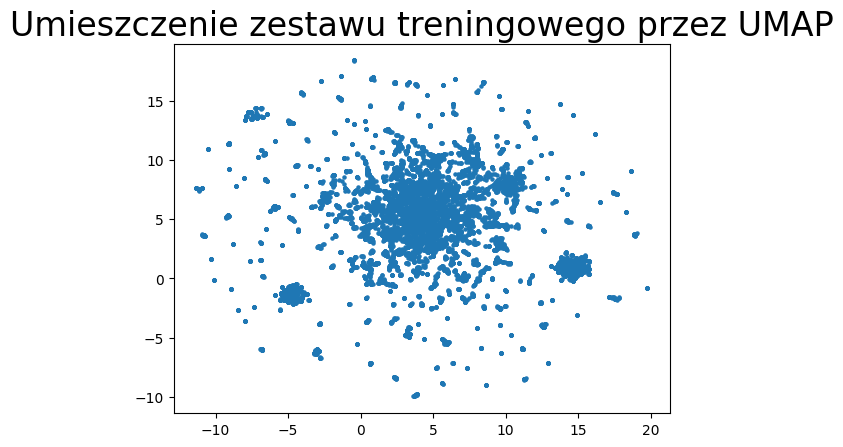

In [100]:
X = df["Tweet"]
y = df["Type"]

X_train, X_test, y_train, y_test = train_test_split(X.index, y, test_size=0.2, random_state=42)
X_train = X.iloc[X_train]
X_test = X.iloc[X_test]
vectorizer = TfidfVectorizer(max_features=50)

X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()

pd.DataFrame(X_train_tfidf, columns=vectorizer.get_feature_names_out())

X_tr = X_train_tfidf
X_te = X_test_tfidf

cl0 = tree.DecisionTreeClassifier().fit(X_tr, y_train)
trans = umap.UMAP(n_neighbors=5, random_state=42).fit(X_tr)

plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s= 5, cmap='Spectral')
plt.title('Umieszczenie zestawu treningowego przez UMAP', fontsize=24);

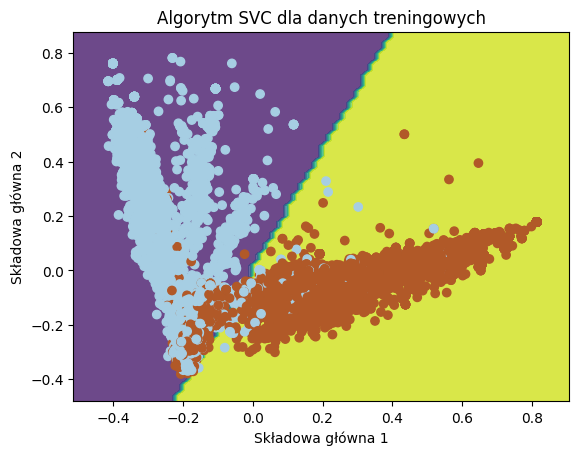

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X.index, y, test_size=0.2, random_state=42)
X_train = X.iloc[X_train]
X_test = X.iloc[X_test]
# Przekształcenie etykiet tekstowych na wartości liczbowe
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(y_train)

# Przekształcenie tekstu na wektory cech
vectorizer = TfidfVectorizer(max_features=50)
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()

# Redukcja wymiarów do dwóch składowych głównych
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train_tfidf)

# Dopasowanie modelu SVC
model = SVC(kernel='linear')
model.fit(X_reduced, labels_encoded)

# Wykreślenie hiperpłaszczyzny
h = 0.02
x_min, x_max = X_reduced[:, 0].min() - 0.1, X_reduced[:, 0].max() + 0.1
y_min, y_max = X_reduced[:, 1].min() - 0.1, X_reduced[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Wykreślenie hiperpłaszczyzny i próbek danych
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels_encoded, cmap=plt.cm.Paired)
plt.xlabel('Składowa główna 1')
plt.ylabel('Składowa główna 2')
plt.title('Algorytm SVC dla danych treningowych')
plt.show()

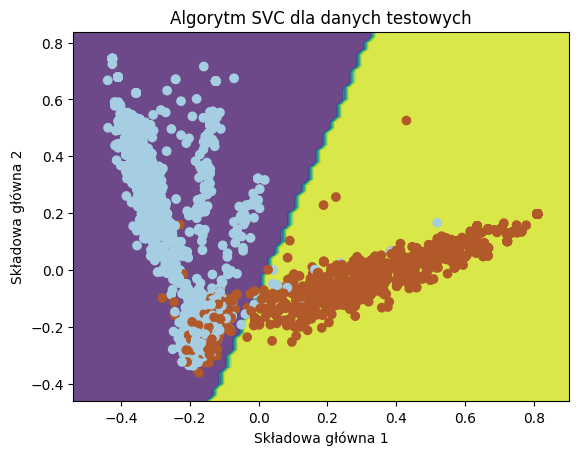

In [82]:
X_test_tfidf = vectorizer.transform(X_test).toarray()
labels_encoded = label_encoder.fit_transform(y_test)

# Redukcja wymiarów do dwóch składowych głównych
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_test_tfidf)

# Dopasowanie modelu SVC
model = SVC(kernel='linear')
model.fit(X_reduced, labels_encoded)

# Wykreślenie hiperpłaszczyzny
h = 0.02
x_min, x_max = X_reduced[:, 0].min() - 0.1, X_reduced[:, 0].max() + 0.1
y_min, y_max = X_reduced[:, 1].min() - 0.1, X_reduced[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Wykreślenie hiperpłaszczyzny i próbek danych
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels_encoded, cmap=plt.cm.Paired)
plt.xlabel('Składowa główna 1')
plt.ylabel('Składowa główna 2')
plt.title('Algorytm SVC dla danych testowych')
plt.show()

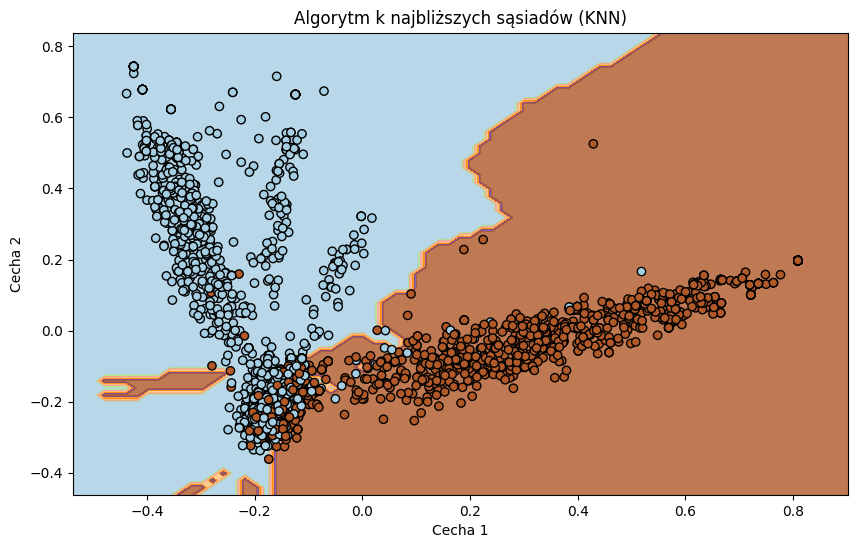

In [97]:
X_reduced = pca.fit_transform(X_test_tfidf)
labels_encoded = label_encoder.fit_transform(y_test)
# Tworzenie modelu KNN
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_reduced, labels_encoded)

# Tworzenie siatki dla wykresu
h = 0.02
x_min, x_max = X_reduced[:, 0].min() - 0.1, X_reduced[:, 0].max() + 0.1
y_min, y_max = X_reduced[:, 1].min() - 0.1, X_reduced[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Klastrowanie punktów na siatce
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Wykreślenie granic decyzyjnych i próbek danych
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels_encoded, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Cecha 1')
plt.ylabel('Cecha 2')
plt.title('Algorytm k najbliższych sąsiadów (KNN)')
plt.show()

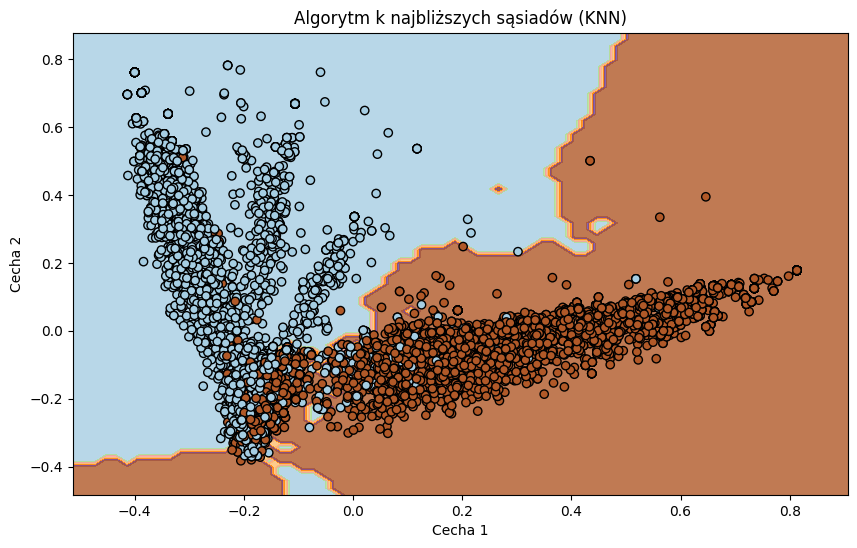

In [98]:
X_reduced = pca.fit_transform(X_train_tfidf)
labels_encoded = label_encoder.fit_transform(y_train)
# Tworzenie modelu KNN
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_reduced, labels_encoded)

# Tworzenie siatki dla wykresu
h = 0.02
x_min, x_max = X_reduced[:, 0].min() - 0.1, X_reduced[:, 0].max() + 0.1
y_min, y_max = X_reduced[:, 1].min() - 0.1, X_reduced[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Klastrowanie punktów na siatce
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Wykreślenie granic decyzyjnych i próbek danych
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=labels_encoded, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Cecha 1')
plt.ylabel('Cecha 2')
plt.title('Algorytm k najbliższych sąsiadów (KNN)')
plt.show()

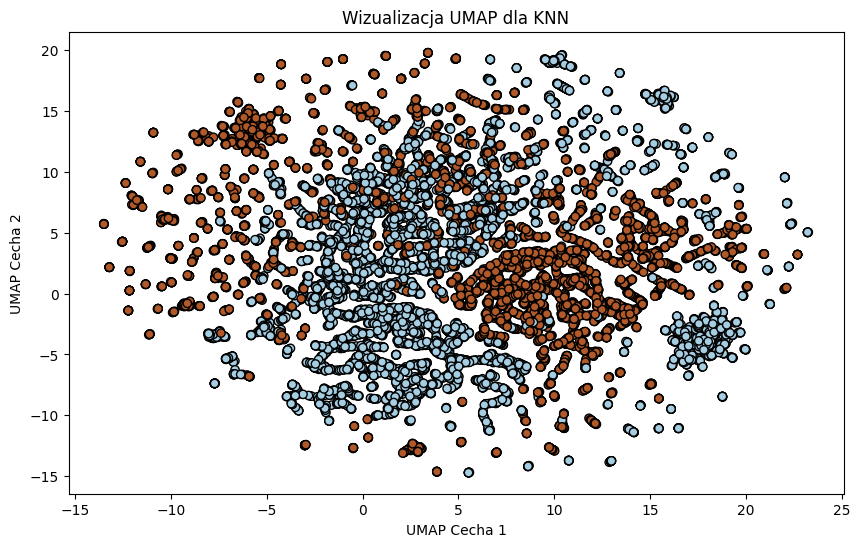

In [103]:
# Zastosowanie UMAP do przekształcenia danych na przestrzeń dwuwymiarową
umap_emb = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=42).fit_transform(X_reduced)

# Wykreślenie przekształconych danych
plt.figure(figsize=(10, 6))
plt.scatter(umap_emb[:, 0], umap_emb[:, 1], c=model.predict(X_reduced), edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('UMAP Cecha 1')
plt.ylabel('UMAP Cecha 2')
plt.title('Wizualizacja UMAP')
plt.show()

Węzeł 0: x[10] <= 0.05116258189082146
Węzeł 1: x[11] <= 0.06235528737306595
Węzeł 2: x[26] <= 0.3668341338634491
Węzeł 3: x[16] <= 0.05549806356430054
Węzeł 4: x[39] <= 0.12735183537006378
Węzeł 5: x[48] <= 0.26680126786231995
Węzeł 6: x[18] <= 0.5801278054714203
Węzeł 7: x[38] <= 0.6193646192550659
Węzeł 8: x[13] <= 0.5142245888710022
Węzeł 9: x[28] <= 0.2954326272010803
Węzeł 10: x[5] <= 0.7352848649024963
Węzeł 11: x[23] <= 0.4194052815437317
Węzeł 12: x[17] <= 0.06502654403448105
Węzeł 13: x[14] <= 0.8530644774436951
Węzeł 14: x[25] <= 0.5190630555152893
Węzeł 15: x[35] <= 0.3614053875207901
Węzeł 16: x[47] <= 0.7913404405117035
Węzeł 17: x[4] <= 0.7231671214103699
Węzeł 18: x[29] <= 0.5323731899261475
Węzeł 19: x[8] <= 0.7014991939067841
Węzeł 20: x[2] <= 0.7124502062797546
Węzeł 21: x[5] <= 0.2666770666837692
Węzeł 22: x[30] <= 0.499268040060997
Węzeł 23: x[36] <= 0.33409345149993896
Węzeł 24: x[32] <= 0.5675217509269714
Węzeł 25: x[45] <= 0.143415167927742
Węzeł 26: x[21] <= 0.2

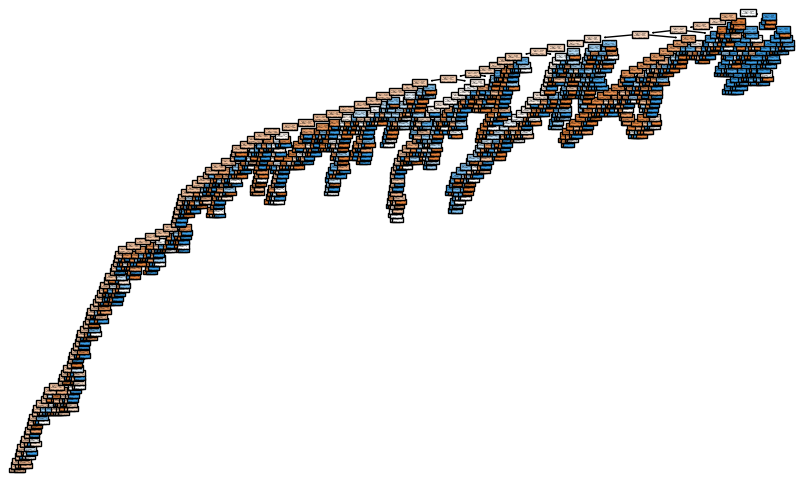

In [44]:
# Narysowanie drzewa decyzyjnego
plt.figure(figsize=(10, 6))
plot_tree(cl0, filled=True)

# Wypisanie etykiet węzłów
nodes = cl0.tree_.node_count
features = cl0.tree_.feature
thresholds = cl0.tree_.threshold

for i in range(nodes):
    if features[i] >= 0:
        print(f"Węzeł {i}: x[{features[i]}] <= {thresholds[i]}")
    else:
        print(f"Węzeł {i}: Liść, klasa = {cl0.classes_[cl0.tree_.value[i].argmax()]}")

plt.show()

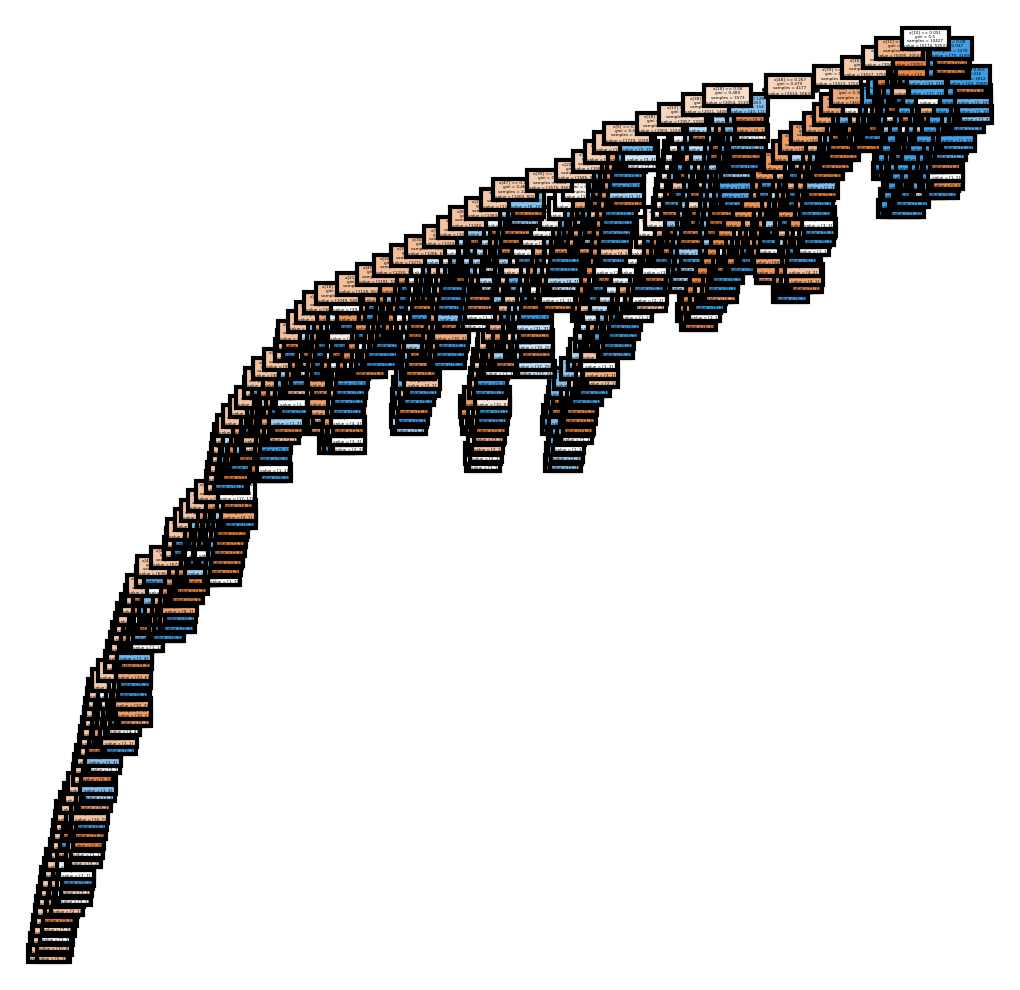

In [54]:
os.environ["PATH"] += os.pathsep + 'D:\\urszu\\Graphviz\\bin\\'


X = df["Tweet"]
y = df["Type"]

X_train, X_test, y_train, y_test = train_test_split(X.index, y, test_size=0.3, random_state=42)
X_train = X.iloc[X_train]
X_test = X.iloc[X_test]
#         vectorizer = CountVectorizer(max_features=50)
#         X_train_bow = vectorizer.fit_transform(X_train).toarray()
#         X_test_bow = vectorizer.transform(X_test).toarray()
#         X_train

#         df.value_counts("location")
#         pd.DataFrame(X_train_bow, columns=vectorizer.get_feature_names_out())


vectorizer = TfidfVectorizer(max_features=50)

X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()

pd.DataFrame(X_train_tfidf, columns=vectorizer.get_feature_names_out())

X_tr = X_train_tfidf
X_te = X_test_tfidf

cl0 = tree.DecisionTreeClassifier().fit(X_tr, y_train)
y_cl0_pred = cl0.predict(X_te)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=300)
tree.plot_tree(cl0, filled=True)
plt.show()

In [57]:
# ...
# Eksport drzewa decyzyjnego do formatu DOT
dot_data = export_graphviz(cl0, out_file=None, filled=True, max_depth=2)
# Tworzenie grafu z dot_data
dot_data = dot_data.replace('X[', 'x[')
graph = graphviz.Source(dot_data)

# Wypisanie wartości na drzewie
tree_values = cl0.tree_.value
node_ids = cl0.apply(X_te)

for node_id in node_ids:
    class_values = tree_values[node_id][0]
    class_labels = cl0.classes_
    value_labels = [f"{class_labels[i]}: {class_values[i]}" for i in range(len(class_labels))]
    print(f"Wartości dla węzła {node_id}: {', '.join(value_labels)}")

Wartości dla węzła 441: Quality: 15.0, Spam: 4.0
Wartości dla węzła 111: Quality: 23.0, Spam: 11.0
Wartości dla węzła 1582: Quality: 0.0, Spam: 2024.0
Wartości dla węzła 1522: Quality: 16.0, Spam: 0.0
Wartości dla węzła 1514: Quality: 2034.0, Spam: 0.0
Wartości dla węzła 936: Quality: 81.0, Spam: 0.0
Wartości dla węzła 1492: Quality: 493.0, Spam: 0.0
Wartości dla węzła 441: Quality: 15.0, Spam: 4.0
Wartości dla węzła 1582: Quality: 0.0, Spam: 2024.0
Wartości dla węzła 1514: Quality: 2034.0, Spam: 0.0
Wartości dla węzła 1492: Quality: 493.0, Spam: 0.0
Wartości dla węzła 1514: Quality: 2034.0, Spam: 0.0
Wartości dla węzła 1514: Quality: 2034.0, Spam: 0.0
Wartości dla węzła 174: Quality: 7.0, Spam: 0.0
Wartości dla węzła 1210: Quality: 26.0, Spam: 55.0
Wartości dla węzła 1103: Quality: 0.0, Spam: 7.0
Wartości dla węzła 1514: Quality: 2034.0, Spam: 0.0
Wartości dla węzła 1582: Quality: 0.0, Spam: 2024.0
Wartości dla węzła 102: Quality: 378.0, Spam: 212.0
Wartości dla węzła 1532: Quality: 0

In [61]:
os.environ["PATH"] += os.pathsep + 'D:\\urszu\\Graphviz\\bin\\'


X = df["Tweet"]
y = df["Type"]

X_train, X_test, y_train, y_test = train_test_split(X.index, y, test_size=0.3, random_state=42)
X_train = X.iloc[X_train]
X_test = X.iloc[X_test]
#         vectorizer = CountVectorizer(max_features=50)
#         X_train_bow = vectorizer.fit_transform(X_train).toarray()
#         X_test_bow = vectorizer.transform(X_test).toarray()
#         X_train

#         df.value_counts("location")
#         pd.DataFrame(X_train_bow, columns=vectorizer.get_feature_names_out())


vectorizer = TfidfVectorizer(max_features=50)

X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()

pd.DataFrame(X_train_tfidf, columns=vectorizer.get_feature_names_out())

X_tr = X_train_tfidf
X_te = X_test_tfidf

cl0 = tree.DecisionTreeClassifier().fit(X_tr, y_train)
y_cl0_pred = cl0.predict(X_te)
# Eksport drzewa decyzyjnego do formatu DOT
dot_data = export_graphviz(cl0, out_file=None, feature_names=vectorizer.get_feature_names_out(), filled=True, max_depth=2)
graph = graphviz.Source(dot_data)

# Wypisanie ważności cech
feature_importance = cl0.feature_importances_
feature_names = vectorizer.get_feature_names_out()

# Sortowanie wartości ważności cech
sorted_indices = sorted(range(len(feature_importance)), key=lambda k: feature_importance[k], reverse=True)
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_feature_importance = [feature_importance[i] for i in sorted_indices]

for feature_name, importance in zip(sorted_feature_names, sorted_feature_importance):
    print(f"Ważność cechy {feature_name}: {importance}")

# Wyświetlenie grafu drzewa decyzyjnego

Ważność cechy co: 0.4797897498685614
Ważność cechy com: 0.11321585858685025
Ważność cechy news: 0.04596221413707394
Ważność cechy http: 0.0449201468846271
Ważność cechy to: 0.019914422200486104
Ważność cechy the: 0.019010390328662103
Ważność cechy in: 0.015834878318318785
Ważność cechy you: 0.014932141280725014
Ważność cechy and: 0.013120507286773586
Ważność cechy for: 0.012751933963212387
Ważność cechy is: 0.012048120664081544
Ważność cechy trump: 0.01198498795461341
Ważność cechy of: 0.011062152275510674
Ważność cechy it: 0.010971702022644898
Ważność cechy not: 0.010196207734100984
Ważność cechy that: 0.009552888710143249
Ważność cechy on: 0.008829005197879816
Ważność cechy we: 0.008682783398666896
Ważność cechy my: 0.007970127982170777
Ważność cechy all: 0.007495046170507338
Ważność cechy will: 0.0071523299109526005
Ważność cechy at: 0.0064666747109369555
Ważność cechy from: 0.0064114030631580035
Ważność cechy have: 0.006234863496339671
Ważność cechy so: 0.005929258777414123
Ważność

In [ ]:
# %pip install transformers
# %pip install torch
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


X_train, X_test, y_train, y_test = train_test_split(X.index, y, test_size=0.2, random_state=42)
X_train = X.iloc[X_train]
X_test = X.iloc[X_test]
# Przekształcenie etykiet tekstowych na wartości liczbowe
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(y_train)

# Przekształcenie tekstu na wektory cech
vectorizer = TfidfVectorizer(max_features=50)
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()

# Tokenizacja tekstu
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
tokenized_texts = [tokenizer.tokenize(x) for x in X_train]

# Kodowanie sekwencji tokenów
input_ids = [tokenizer.convert_tokens_to_ids(tokens) for tokens in tokenized_texts]

# Dopasowanie długości sekwencji
max_length = max(len(seq) for seq in input_ids)
input_ids = [seq + [0] * (max_length - len(seq)) for seq in input_ids]

# Konwersja do tensorów pytorch
input_ids = torch.tensor(input_ids)
labels = torch.tensor(labels_encoded)

# Podział danych na zbiór treningowy i testowy
train_inputs, test_inputs, train_labels, test_labels = train_test_split(input_ids, labels, test_size=0.2, random_state=42)

# Tworzenie zbiorów danych
train_dataset = TensorDataset(train_inputs, train_labels)
test_dataset = TensorDataset(test_inputs, test_labels)

# Tworzenie obiektów DataLoader
batch_size = 2
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Załadowanie modelu BERT
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Definicja optymalizatora
optimizer = AdamW(model.parameters(), lr=2e-5)

# Trenowanie modelu
epochs = 5
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_dataloader:
        batch = tuple(t.to(device) for t in batch)
        input_ids, labels = batch

        model.zero_grad()
        outputs = model(input_ids, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()

    average_loss = total_loss / len(train_dataloader)
    print(f"Epoch {epoch+1}/{epochs} - Average Loss: {average_loss}")

# Testowanie modelu
model.eval()
total_correct = 0
total_samples = 0

for batch in test_dataloader:
    batch = tuple(t.to(device) for t in batch)
    input_ids, labels = batch

    with torch.no_grad():
        outputs = model(input_ids)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=1)
        total_correct += torch.sum(predictions == labels).item()
        total_samples += labels.size(0)

accuracy = total_correct / total_samples
print(f"Accuracy: {accuracy}")